In [1]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math
import random
from random import randrange

# Importing bmtk libraries for network building and simulation
from bmtk.builder.networks import NetworkBuilder
from bmtk.simulator import bionet
from bmtk.simulator.bionet.pyfunction_cache import add_weight_function
from bmtk.utils.reports.spike_trains import PoissonSpikeGenerator

# Enabling interactive plots
%matplotlib notebook

###################### Column 1 ##########################

# intialize a new population of cells called "V1"
v1 = NetworkBuilder('V1')
####
Scaling_WS = 1 #/Scaling_WS
Delay_Dec = 1
##################### Randomness for Width ######################
################################################################
Const_Sig = 1
Sig_Pyr = 1.45 *Const_Sig
Sig_PV1 = 4.5 * Const_Sig   #1.9 #4
Sig_Sst = 4 * Const_Sig #1.6 #3
Sig_VIP = 2 * Const_Sig #1.1 #2


Random_WS_I_Pyr = 0.8 #0.7                                                                                                                                                                                               
Random_WS_F_Pyr = 2 #2

Random_WS_I_PV = 0.5 #0.2                                                                                                                                                                                               
Random_WS_F_PV = 1.4 #1.2

Random_WS_I_Sst = 0.55 #0.5                                                                                                                                                                                               
Random_WS_F_Sst = 1.50 #1.5

Random_WS_I_VIP = 0.75 #0.6                                                                                                                                                                                               
Random_WS_F_VIP = 1.65 #1.6


#LGN_Angle = 90

Amp_Stim = 8  # 8 Sst   15 PV1    8 VIP
TG_PoP = 'VIP' #PV1 Sst VIP  Scnn1a

LGN_Rate = 15 #15 #12 25
SW_LGN_Pyr = 0.0030 #0.004 #0.007 #0.007  #0.012 #0.005 #0.05 # 0.006 #0.008 #0.006  L4
L2_SW_LGN_Pyr = 0 #0.0025 #
L5_SW_LGN_Pyr = 0 #0.0025 #
L6_SW_LGN_Pyr = 0 #0.012 #0.0025 #

SW_LGN_PV  = 0.3 #0.2 #0.09 #0.07 #0.05  #1 #0.6 #0.07  #0.04
WS_LGN_Pyr = 35/Scaling_WS #6/Scaling_WS
WS_LGN_PV  = 40/Scaling_WS #41/Scaling_WS

SW_LGN_Sst =  0.025 #0.05 #0.03  
WS_LGN_Sst =  38/Scaling_WS  #17/Scaling_WS

Max_Distance = 20 #4*4 #5 #4 #3 #7

Exc_Inh_Cons = 0.15 # 0.20

Pyr_Pyr=  0.00035 #0.00035 #0.00035 
Pyr_PV=   Exc_Inh_Cons * 0.040 * 0.5/Scaling_WS    #0.045
Pyr_Sst=  Exc_Inh_Cons * 0.025 * 0.5/Scaling_WS # 0.020 # 0.031   #0.026 
Pyr_VIP=  Exc_Inh_Cons * 0.020 * 0.5/Scaling_WS  #0.02

########################################################
################# Synaptic Weights #####################

######### Output of L2
EE_L2_L4 = 1 #1 
EE_L2_L5 = 2 #2
EE_L2_L6 = 1 #1
 
EI_L2_L4 = 2 #2
EI_L2_L5 = 1 #1 
EI_L2_L6 = 1 #1

II_L2_L4 = 1 #1
II_L2_L5 = 1 #1
II_L2_L6 = 1 #1

IE_L2_L4 = 1 #1
IE_L2_L5 = 2 #2
IE_L2_L6 = 1 #1

########## Output of L4

EE_L4_L2 = 6 #6 # 10
EE_L4_L5 = 5 #5 # 10
EE_L4_L6 = 5 #5 # 10

EI_L4_L2 = 1 #1
EI_L4_L5 = 1 #1
EI_L4_L6 = 1 #1

II_L4_L2 = 1 #1
II_L4_L5 = 1 #1
II_L4_L6 = 1 #1

IE_L4_L2 = 2 #2
IE_L4_L5 = 1 #1
IE_L4_L6 = 1 #1

########## Output of L5

EE_L5_L2 = 1 #1
EE_L5_L4 = 1 #1
EE_L5_L6 = 1 #1

EI_L5_L2 = 1 #1
EI_L5_L4 = 1 #1
EI_L5_L6 = 1 #1

II_L5_L4 = 1 #1
II_L5_L6 = 1 #1

IE_L5_L6 = 1 #1

########## Output of L6

EE_L6_L2 = 1 #1
EE_L6_L4 = 1 #1
EE_L6_L5 = 1 #1

EI_L6_L2 = 2 #2
EI_L6_L4 = 1 #1
EI_L6_L5 = 1 #1

#######################################################
Inh_Const = 0.0024 # 0.0024 #0.0025  #0.002  #0.001 #0.003 

PV_Pyr= Inh_Const * 1   #1
PV_PV=  Inh_Const * 1.01  #1.01   #0.001 # 0.002
PV_VIP= Inh_Const * 0.22  #0.22   #0.00025 # 0.002 # 0.002

Sst_Pyr= Inh_Const * 1 #0.54 #  0.74    #0.54   #0.00050 # 0.075
Sst_PV=  Inh_Const * 0.33 #  0.33    #0.00035 #0.002  # 0.002
Sst_VIP= Inh_Const * 0.77 #  0.77    #0.00075 #0.002 # 0.002

VIP_Pyr= Inh_Const * 0.02 #0.02   #0.0001 #0.0035 #0.00035
VIP_Sst= Inh_Const * 20 #0.0010 #0.02 #1     #1 0.8
Synapse_VIP_Sst = 1
#########################################################
# PV_Pyr= Inh_Const * 1       #0.001 # 0.055
# PV_PV=  Inh_Const * 1.01    #0.001 # 0.002
# PV_VIP= Inh_Const * 0.22    #0.00025 # 0.002 # 0.002

# Sst_Pyr= Inh_Const * 0.74 # #0.54   #0.00050 # 0.075
# Sst_PV=  Inh_Const * 0.33   #0.00035 #0.002  # 0.002
# Sst_VIP= Inh_Const * 0.77   #0.00075 #0.002 # 0.002

# VIP_Pyr= Inh_Const * 0.02   #0.0001 #0.0035 #0.00035
# VIP_Sst= Inh_Const * 1   #0.0010 #0.02 #1     #1 0.8
#########################################################
####


WS_Pyr_Pyr = 5/Scaling_WS      #12*1   #24
WS_Pyr_PV =  15/Scaling_WS      #16*2.5  #2.5  #32
WS_Pyr_Sst = 10/Scaling_WS   #35  #14*2.5 #2.5  #27
WS_Pyr_VIP = 5/Scaling_WS      #11*2.5 #2.5  #22

WS_PV_PV =  15/Scaling_WS   #16*2  #32
WS_PV_Pyr = 15/Scaling_WS   #12*2 #24
WS_PV_VIP = 15/Scaling_WS   #11*2 #22

WS_Sst_VIP = 15/Scaling_WS   #11*2 #22
WS_Sst_PV =  15/Scaling_WS   #16*2  #32
WS_Sst_Pyr = 15/Scaling_WS   #12*2 #24 

WS_VIP_Pyr = 15/Scaling_WS    #12*2 #24
WS_VIP_Sst = 15/Scaling_WS    #35 #14*2 #27
#####
# Targes Section: ['basal', 'apical','somatic'],

TS_Pyr_Pyr = ['basal', 'apical']
TS_Pyr_PV  = ['somatic', 'basal']
TS_Pyr_Sst = ['somatic', 'basal']
TS_Pyr_VIP = ['somatic', 'basal']

TS_PV_Pyr  = ['somatic', 'basal', 'apical']
TS_PV_PV   = ['somatic', 'basal']
TS_PV_VIP  = ['somatic','basal']

TS_Sst_Pyr = ['basal', 'apical']
TS_Sst_PV  = ['basal']
TS_Sst_VIP = ['basal']

TS_VIP_Pyr = ['basal', 'apical']
TS_VIP_Sst = ['basal']

#########################################
################# Delays ################


D2_Pyr_Pyr = 1.6
D2_Pyr_PV = 1.2
D2_Pyr_Sst = 1.5
D2_Pyr_VIP = 1.5
D2_PV_PV = 1.6
D2_PV_Pyr = 0.9
D2_PV_VIP = 1.2
D2_Sst_VIP =1.5
D2_Sst_PV = 1.5
D2_Sst_Pyr = 1.5
D2_VIP_Pyr = 1.5
D2_VIP_Sst = 1.5

D4_Pyr_Pyr = 1.3
D4_Pyr_PV = 0.9
D4_Pyr_Sst = 1.2
D4_Pyr_VIP = 1.2
D4_PV_PV = 1.3
D4_PV_Pyr = 0.6
D4_PV_VIP = 0.9
D4_Sst_VIP = 1.2
D4_Sst_PV = 1.2
D4_Sst_Pyr = 1.2
D4_VIP_Pyr = 1.2
D4_VIP_Sst = 1.2

D5_Pyr_Pyr = 1.5
D5_Pyr_PV = 1.1
D5_Pyr_Sst = 1.4
D5_Pyr_VIP = 1.4
D5_PV_PV = 1.5
D5_PV_Pyr = 0.8
D5_PV_VIP = 1.1
D5_Sst_VIP = 1.4
D5_Sst_PV = 1.4
D5_Sst_Pyr = 1.4
D5_VIP_Pyr = 1.4
D5_VIP_Sst = 1.4

D6_Pyr_Pyr = 1.8
D6_Pyr_PV = 1.4
D6_Pyr_Sst = 1.7
D6_Pyr_VIP = 1.7
D6_PV_PV = 1.8
D6_PV_Pyr = 1.1
D6_PV_VIP = 1.4
D6_Sst_VIP = 1.7
D6_Sst_PV = 1.7
D6_Sst_Pyr = 1.7
D6_VIP_Pyr = 1.7
D6_VIP_Sst = 1.7

####
##### Laminar

####
###########################################################################################################
################################# Column 2 ################################################################
###########################################################################################################

################################# L6
############################################ P3 P2 P1

# v1.add_nodes(
#     # Scnn1a excitatory cells
#     N=25, pop_name='Scnn1a', location='L6', ei='2e1', Int='P3',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='472363762_fit.json',
#     morphology='Scnn1a_473845048_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(70, 80, num=25),
#     y=np.linspace(0, 50, num=25),
#     z=np.linspace(0, 160, num=25),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, 
#     tuning_angle=np.linspace(start=84, stop=96, num=25, endpoint=True),

#  )

np.random.seed(21)

const_seed = 201
random.seed(const_seed)

v1.add_nodes(
    # Scnn1a excitatory cells
    N=100, pop_name='Scnn1a', location='L6', ei='2e1', Int='P2',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    dynamics_params='472363762_fit.json',
    morphology='Scnn1a_473845048_m.swc',
    model_processing='aibs_perisomatic',
    x=np.random.normal(0, 25, size=100),
    y=np.linspace(0, 50, num=100),
    z=np.random.normal(0, 25, size=100),   
    rotation_angle_xaxis=0.6+3.14, 
    rotation_angle_yaxis=-3.14, 
    rotation_angle_zaxis=-0.6-3.14, 
    tuning_angle=np.linspace(start=84, stop=96, num=100, endpoint=True),
    Sig = Sig_Pyr,
    Randomness = [random.uniform(Random_WS_I_Pyr, Random_WS_F_Pyr) for i in range(0, 100)],
    #Randomness=np.random.uniform(Random_WS_I, Random_WS_F, size=100), #Randomness=np.random.uniform(0.8, 1.2, size=100),
    #print(Randomness),
 )

# v1.add_nodes(
#     # Scnn1a excitatory cells
#     N=25, pop_name='Scnn1a', location='L6', ei='2e1', Int='P1',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='472363762_fit.json',
#     morphology='Scnn1a_473845048_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(40.1, 50, num=25),
#     y=np.linspace(0, 50, num=25),
#     z=np.linspace(0, 160, num=25),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, 
#     tuning_angle=np.linspace(start=84, stop=96, num=25, endpoint=True),

#  )

# v1.add_nodes(
#     # Parvalbuim inhibitory cells, 
#     N=4, pop_name='PV1', location='L6', ei='2i1', Int='P3',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='472912177_fit.json',
#     morphology='Pvalb_470522102_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(70, 80, num=4),
#     y=np.linspace(0, 50, num=4),
#     z=np.linspace(0, 160, num=4),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
#     tuning_angle=np.linspace(start=84, stop=96, num=4, endpoint=True),
#     )
np.random.seed(22)
const_seed = 202
random.seed(const_seed)

v1.add_nodes(
    # Parvalbuim inhibitory cells, 
    N=16, pop_name='PV1', location='L6', ei='2i1', Int='P2',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    dynamics_params='472912177_fit.json',
    morphology='Pvalb_470522102_m.swc',
    model_processing='aibs_perisomatic',
    x=np.random.normal(0, 25, size=16),
    y=np.linspace(0, 50, num=16),
    z=np.random.normal(0, 25, size=16),   
    rotation_angle_xaxis=0.6+3.14, 
    rotation_angle_yaxis=-3.14, 
    rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
    tuning_angle=np.linspace(start=84, stop=96, num=16, endpoint=True),
    Sig = Sig_PV1,

#     #Randomness=np.random.uniform(Random_WS_I, Random_WS_F, size=16),
    Randomness = [random.uniform(Random_WS_I_PV, Random_WS_F_PV) for i in range(0, 16)],
    #Randomness=np.random.uniform(Random_WS_I, Random_WS_F, size=100), #Randomness=np.random.uniform(0.8, 1.2, size=100),
    #print(Randomness),
    
    )

# v1.add_nodes(
#     # Parvalbuim inhibitory cells, 
#     N=4, pop_name='PV1', location='L6', ei='2i1', Int='P1',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='472912177_fit.json',
#     morphology='Pvalb_470522102_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(40.1, 50, num=4),
#     y=np.linspace(0, 50, num=4),
#     z=np.linspace(0, 160, num=4),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
#     tuning_angle=np.linspace(start=84, stop=96, num=4, endpoint=True),
#     )
# v1.add_nodes(
#     # Parvalbuim inhibitory cells, 
#     N=2, pop_name='Sst', location='L6', ei='2i1', Int='P3',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='323452196_fit.json',
#     morphology='Sst_513556739_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(70, 80, num=2),
#     y=np.linspace(0, 50, num=2),
#     z=np.linspace(0, 160, num=2),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
#     tuning_angle=np.linspace(start=84, stop=96, num=2, endpoint=True),
#     )
np.random.seed(23)
const_seed = 203
random.seed(const_seed)

v1.add_nodes(
    # Parvalbuim inhibitory cells, 
    N=8, pop_name='Sst', location='L6', ei='2i1', Int='P2',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    dynamics_params='323452196_fit.json',
    morphology='Sst_513556739_m.swc',
    model_processing='aibs_perisomatic',
    x=np.random.normal(0, 25, size=8),
    y=np.linspace(0, 50, num=8),
    z=np.random.normal(0, 25, size=8),   
    rotation_angle_xaxis=0.6+3.14, 
    rotation_angle_yaxis=-3.14, 
    rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
    tuning_angle=np.linspace(start=84, stop=96, num=8, endpoint=True),
    Sig = Sig_Sst,
    Randomness = [random.uniform(Random_WS_I_Sst, Random_WS_F_Sst) for i in range(0, 8)],
    #Randomness=np.random.uniform(Random_WS_I, Random_WS_F, size=8),
    
    )
# v1.add_nodes(
#     # Parvalbuim inhibitory cells, 
#     N=2, pop_name='Sst', location='L6', ei='2i1', Int='P1',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='323452196_fit.json',
#     morphology='Sst_513556739_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(40.1, 50, num=2),
#     y=np.linspace(0, 50, num=2),
#     z=np.linspace(0, 160, num=2),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
#     tuning_angle=np.linspace(start=84, stop=96, num=2, endpoint=True),
#     )
# v1.add_nodes(
#     # Parvalbuim inhibitory cells, 
#     N=1, pop_name='VIP', location='L6', ei='2i1', Int='P3',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='475585413_fit.json',
#     morphology='Htr3a_492100857_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(70, 80, num=1),
#     y=np.linspace(0, 50, num=1),
#     z=np.linspace(0, 160, num=1),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
#     tuning_angle=np.linspace(start=90, stop=90, num=1, endpoint=True),
#     )

np.random.seed(24)
const_seed = 204
random.seed(const_seed)

v1.add_nodes(
    # Parvalbuim inhibitory cells, 
    N=3, pop_name='VIP', location='L6', ei='2i1', Int='P2',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    dynamics_params='475585413_fit.json',
    morphology='Htr3a_492100857_m.swc',
    model_processing='aibs_perisomatic',
    x=np.random.normal(0, 25, size=3),
    y=np.linspace(0, 50, num=3),
    z=np.random.normal(0, 25, size=3),   
    rotation_angle_xaxis=0.6+3.14, 
    rotation_angle_yaxis=-3.14, 
    rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
    tuning_angle=np.linspace(start=90, stop=90, num=3, endpoint=True),
    Sig = Sig_VIP,
    Randomness = [random.uniform(Random_WS_I_VIP, Random_WS_F_VIP) for i in range(0, 3)],
    
    #Randomness=np.random.uniform(Random_WS_I, Random_WS_F, size=3),
    )
# v1.add_nodes(
#     # Parvalbuim inhibitory cells, 
#     N=1, pop_name='VIP', location='L6', ei='2i1', Int='P1',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='475585413_fit.json',
#     morphology='Htr3a_492100857_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(40.1, 50, num=1),
#     y=np.linspace(0, 50, num=1),
#     z=np.linspace(0, 160, num=1),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
#     tuning_angle=np.linspace(start=90, stop=90, num=1, endpoint=True),
#     )

################################# L5
############################################ P3 P2 P1

# v1.add_nodes(
#     # Scnn1a excitatory cells
#     N=25, pop_name='Scnn1a', location='L5', ei='2e1', Int='P3',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='472363762_fit.json',
#     morphology='Scnn1a_473845048_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(70, 80, num=25),
#     y=np.linspace(50, 100, num=25),
#     z=np.linspace(0, 160, num=25),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, 
#     tuning_angle=np.linspace(start=84, stop=96, num=25, endpoint=True),
#  )
np.random.seed(25)
const_seed = 205
random.seed(const_seed)

v1.add_nodes(
    # Scnn1a excitatory cells
    N=100, pop_name='Scnn1a', location='L5', ei='2e1', Int='P2',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    dynamics_params='472363762_fit.json',
    morphology='Scnn1a_473845048_m.swc',
    model_processing='aibs_perisomatic',
    x=np.random.normal(0, 25, size=100),
    y=np.linspace(50, 100, num=100),
    z=np.random.normal(0, 25, size=100),   
    rotation_angle_xaxis=0.6+3.14, 
    rotation_angle_yaxis=-3.14, 
    rotation_angle_zaxis=-0.6-3.14, 
    tuning_angle=np.linspace(start=84, stop=96, num=100, endpoint=True),
    Sig = Sig_Pyr,
    #Randomness=np.random.uniform(Random_WS_I, Random_WS_F, size=100),
    Randomness = [random.uniform(Random_WS_I_Pyr, Random_WS_F_Pyr) for i in range(0, 100)],
 )
# v1.add_nodes(
#     # Scnn1a excitatory cells
#     N=25, pop_name='Scnn1a', location='L5', ei='2e1', Int='P1',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='472363762_fit.json',
#     morphology='Scnn1a_473845048_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(40.1, 50, num=25),
#     y=np.linspace(50, 100, num=25),
#     z=np.linspace(0, 160, num=25),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, 
#     tuning_angle=np.linspace(start=84, stop=96, num=25, endpoint=True),
#  )
# v1.add_nodes(
#     # Parvalbuim inhibitory cells, 
#     N=4, pop_name='PV1', location='L5', ei='2i1', Int='P3',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='472912177_fit.json',
#     morphology='Pvalb_470522102_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(70, 80, num=4),
#     y=np.linspace(50, 100, num=4),
#     z=np.linspace(0, 160, num=4),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
#     tuning_angle=np.linspace(start=84, stop=96, num=4, endpoint=True),
#     )
np.random.seed(26)
const_seed = 206
random.seed(const_seed)

v1.add_nodes(
    # Parvalbuim inhibitory cells, 
    N=16, pop_name='PV1', location='L5', ei='2i1', Int='P2',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    dynamics_params='472912177_fit.json',
    morphology='Pvalb_470522102_m.swc',
    model_processing='aibs_perisomatic',
    x=np.random.normal(0, 25, size=16),
    y=np.linspace(50, 100, num=16),
    z=np.random.normal(0, 25, size=16),   
    rotation_angle_xaxis=0.6+3.14, 
    rotation_angle_yaxis=-3.14, 
    rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
    tuning_angle=np.linspace(start=84, stop=96, num=16, endpoint=True),
    Sig = Sig_PV1,
    Randomness = [random.uniform(Random_WS_I_PV, Random_WS_F_PV) for i in range(0, 16)],
    
    #Randomness=np.random.uniform(Random_WS_I, Random_WS_F, size=16),
    )
# v1.add_nodes(
#     # Parvalbuim inhibitory cells, 
#     N=4, pop_name='PV1', location='L5', ei='2i1', Int='P1',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='472912177_fit.json',
#     morphology='Pvalb_470522102_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(40.1, 50, num=4),
#     y=np.linspace(50, 100, num=4),
#     z=np.linspace(0, 160, num=4),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
#     tuning_angle=np.linspace(start=84, stop=96, num=4, endpoint=True),
#     )
# v1.add_nodes(
#     # Parvalbuim inhibitory cells, 
#     N=2, pop_name='Sst', location='L5', ei='2i1', Int='P3',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='323452196_fit.json',
#     morphology='Sst_513556739_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(70, 80, num=2),
#     y=np.linspace(50, 100, num=2),
#     z=np.linspace(0, 160, num=2),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
#     tuning_angle=np.linspace(start=84, stop=96, num=2, endpoint=True),
#     )
np.random.seed(27)
const_seed = 207
random.seed(const_seed)

v1.add_nodes(
    # Parvalbuim inhibitory cells, 
    N=8, pop_name='Sst', location='L5', ei='2i1', Int='P2',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    dynamics_params='323452196_fit.json',
    morphology='Sst_513556739_m.swc',
    model_processing='aibs_perisomatic',
    x=np.random.normal(0, 25, size=8),
    y=np.linspace(50, 100, num=8),
    z=np.random.normal(0, 25, size=8),   
    rotation_angle_xaxis=0.6+3.14, 
    rotation_angle_yaxis=-3.14, 
    rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
    tuning_angle=np.linspace(start=84, stop=96, num=8, endpoint=True),
    Sig = Sig_Sst,
    Randomness = [random.uniform(Random_WS_I_Sst, Random_WS_F_Sst) for i in range(0, 8)],
    
    #Randomness=np.random.uniform(Random_WS_I, Random_WS_F, size=8),
    )
# v1.add_nodes(
#     # Parvalbuim inhibitory cells, 
#     N=2, pop_name='Sst', location='L5', ei='2i1', Int='P1',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='323452196_fit.json',
#     morphology='Sst_513556739_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(40.1, 50, num=2),
#     y=np.linspace(50, 100, num=2),
#     z=np.linspace(0, 160, num=2),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
#     tuning_angle=np.linspace(start=84, stop=96, num=2, endpoint=True),
#     )

# v1.add_nodes(
#     # Parvalbuim inhibitory cells, 
#     N=1, pop_name='VIP', location='L5', ei='2i1', Int='P3',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='475585413_fit.json',
#     morphology='Htr3a_492100857_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(70, 80, num=1),
#     y=np.linspace(50, 100, num=1),
#     z=np.linspace(0, 160, num=1),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
#     tuning_angle=np.linspace(start=90, stop=90, num=1, endpoint=True),
#     )
np.random.seed(28)
const_seed = 208
random.seed(const_seed)

v1.add_nodes(
    # Parvalbuim inhibitory cells, 
    N=3, pop_name='VIP', location='L5', ei='2i1', Int='P2',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    dynamics_params='475585413_fit.json',
    morphology='Htr3a_492100857_m.swc',
    model_processing='aibs_perisomatic',
    x=np.random.normal(0, 25, size=3),
    y=np.linspace(50, 100, num=3),
    z=np.random.normal(0, 25, size=3),   
    rotation_angle_xaxis=0.6+3.14, 
    rotation_angle_yaxis=-3.14, 
    rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
    tuning_angle=np.linspace(start=90, stop=90, num=3, endpoint=True),
    Sig = Sig_VIP,
    Randomness = [random.uniform(Random_WS_I_VIP, Random_WS_F_VIP) for i in range(0, 3)],
    #Randomness=np.random.uniform(Random_WS_I, Random_WS_F, size=3),
    )
# v1.add_nodes(
#     # Parvalbuim inhibitory cells, 
#     N=1, pop_name='VIP', location='L5', ei='2i1', Int='P1',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='475585413_fit.json',
#     morphology='Htr3a_492100857_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(40.1, 50, num=1),
#     y=np.linspace(50, 100, num=1),
#     z=np.linspace(0, 160, num=1),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
#     tuning_angle=np.linspace(start=90, stop=90, num=1, endpoint=True),
#     )

################################# L4
############################################ P3 P2 P1

# v1.add_nodes(
#     # Scnn1a excitatory cells
#     N=25, pop_name='Scnn1a', location='L4', ei='2e1', Int='P3',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='472363762_fit.json',
#     morphology='Scnn1a_473845048_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(70, 80, num=25),
#     y=np.linspace(100, 150, num=25),
#     z=np.linspace(0, 160, num=25),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, 
#     tuning_angle=np.linspace(start=84, stop=96, num=25, endpoint=True),
# )
np.random.seed(29)
const_seed = 209
random.seed(const_seed)

v1.add_nodes(
    # Scnn1a excitatory cells
    N=100, pop_name='Scnn1a', location='L4', ei='2e1', Int='P2',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    dynamics_params='472363762_fit.json',
    morphology='Scnn1a_473845048_m.swc',
    model_processing='aibs_perisomatic',
    x=np.random.normal(0, 25, size=100),
    y=np.linspace(100, 150, num=100),
    z=np.random.normal(0, 25, size=100),   
    rotation_angle_xaxis=0.6+3.14, 
    rotation_angle_yaxis=-3.14, 
    rotation_angle_zaxis=-0.6-3.14, 
    tuning_angle=np.linspace(start=84, stop=96, num=100, endpoint=True),
    Sig = Sig_Pyr,
    Randomness = [random.uniform(Random_WS_I_Pyr, Random_WS_F_Pyr) for i in range(0, 100)],
    #Randomness=np.random.uniform(Random_WS_I, Random_WS_F, size=100),

 )
# v1.add_nodes(
#     # Scnn1a excitatory cells
#     N=25, pop_name='Scnn1a', location='L4', ei='2e1', Int='P1',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='472363762_fit.json',
#     morphology='Scnn1a_473845048_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(40.1, 50, num=25),
#     y=np.linspace(100, 150, num=25),
#     z=np.linspace(0, 160, num=25),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, 
#     tuning_angle=np.linspace(start=84, stop=96, num=25, endpoint=True),

#  )

# v1.add_nodes(
#     # Parvalbuim inhibitory cells, 
#     N=4, pop_name='PV1', location='L4', ei='2i1', Int='P3',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='472912177_fit.json',
#     morphology='Pvalb_470522102_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(70, 80, num=4),
#     y=np.linspace(100, 150, num=4),
#     z=np.linspace(0, 160, num=4),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
#     tuning_angle=np.linspace(start=84, stop=96, num=4, endpoint=True),
#     )

np.random.seed(30)
const_seed = 210
random.seed(const_seed)

v1.add_nodes(
    # Parvalbuim inhibitory cells, 
    N=16, pop_name='PV1', location='L4', ei='2i1', Int='P2',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    dynamics_params='472912177_fit.json',
    morphology='Pvalb_470522102_m.swc',
    model_processing='aibs_perisomatic',
    x=np.random.normal(0, 25, size=16),
    y=np.linspace(100, 150, num=16),
    z=np.random.normal(0, 25, size=16),   
    rotation_angle_xaxis=0.6+3.14, 
    rotation_angle_yaxis=-3.14, 
    rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
    tuning_angle=np.linspace(start=84, stop=96, num=16, endpoint=True),
    Sig = Sig_PV1,
    Randomness = [random.uniform(Random_WS_I_PV, Random_WS_F_PV) for i in range(0, 16)],
    #Randomness=np.random.uniform(Random_WS_I, Random_WS_F, size=16),
    )
# v1.add_nodes(
#     # Parvalbuim inhibitory cells, 
#     N=4, pop_name='PV1', location='L4', ei='2i1', Int='P1',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='472912177_fit.json',
#     morphology='Pvalb_470522102_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(40.1, 50, num=4),
#     y=np.linspace(100, 150, num=4),
#     z=np.linspace(0, 160, num=4),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
#     tuning_angle=np.linspace(start=84, stop=96, num=4, endpoint=True),
#     )

# v1.add_nodes(
#     # Parvalbuim inhibitory cells, 
#     N=2, pop_name='Sst', location='L4', ei='2i1', Int='P3',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='323452196_fit.json',
#     morphology='Sst_513556739_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(70, 80, num=2),
#     y=np.linspace(100, 150, num=2),
#     z=np.linspace(0, 160, num=2),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
#     tuning_angle=np.linspace(start=84, stop=96, num=2, endpoint=True),
#     )

np.random.seed(31)
const_seed = 211
random.seed(const_seed)


v1.add_nodes(
    # Parvalbuim inhibitory cells, 
    N=8, pop_name='Sst', location='L4', ei='2i1', Int='P2',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    dynamics_params='323452196_fit.json',
    morphology='Sst_513556739_m.swc',
    model_processing='aibs_perisomatic',
    x=np.random.normal(0, 25, size=8),
    y=np.linspace(100, 150, num=8),
    z=np.random.normal(0, 25, size=8),   
    rotation_angle_xaxis=0.6+3.14, 
    rotation_angle_yaxis=-3.14, 
    rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
    tuning_angle=np.linspace(start=84, stop=96, num=8, endpoint=True),
    Sig = Sig_Sst,
    Randomness = [random.uniform(Random_WS_I_Sst, Random_WS_F_Sst) for i in range(0, 8)],
    #Randomness=np.random.uniform(Random_WS_I, Random_WS_F, size=8),
    )
# v1.add_nodes(
#     # Parvalbuim inhibitory cells, 
#     N=2, pop_name='Sst', location='L4', ei='2i1', Int='P1',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='323452196_fit.json',
#     morphology='Sst_513556739_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(40.1, 50, num=2),
#     y=np.linspace(100, 150, num=2),
#     z=np.linspace(0, 160, num=2),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
#     tuning_angle=np.linspace(start=84, stop=96, num=2, endpoint=True),
#     )

# v1.add_nodes(
#     # Parvalbuim inhibitory cells, 
#     N=1, pop_name='VIP', location='L4', ei='2i1', Int='P3',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='475585413_fit.json',
#     morphology='Htr3a_492100857_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(70, 80, num=1),
#     y=np.linspace(100, 150, num=1),
#     z=np.linspace(0, 160, num=1),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
#     tuning_angle=np.linspace(start=90, stop=90, num=1, endpoint=True),
#     )
np.random.seed(32)
const_seed = 212
random.seed(const_seed)

v1.add_nodes(
    # Parvalbuim inhibitory cells, 
    N=4, pop_name='VIP', location='L4', ei='2i1', Int='P2',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    dynamics_params='475585413_fit.json',
    morphology='Htr3a_492100857_m.swc',
    model_processing='aibs_perisomatic',
    x=np.random.normal(0, 25, size=4),
    y=np.linspace(100, 150, num=4),
    z=np.random.normal(0, 25, size=4),   
    rotation_angle_xaxis=0.6+3.14, 
    rotation_angle_yaxis=-3.14, 
    rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
    tuning_angle=np.linspace(start=84, stop=96, num=4, endpoint=True),
    Sig = Sig_VIP,
    Randomness = [random.uniform(Random_WS_I_VIP, Random_WS_F_VIP) for i in range(0, 4)],
    #Randomness=np.random.uniform(Random_WS_I, Random_WS_F, size=4),
    )

# v1.add_nodes(
#     # Parvalbuim inhibitory cells, 
#     N=1, pop_name='VIP', location='L4', ei='2i1', Int='P1',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='475585413_fit.json',
#     morphology='Htr3a_492100857_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(40.1, 50, num=1),
#     y=np.linspace(100, 150, num=1),
#     z=np.linspace(0, 160, num=1),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, #-4.159763785,
#     tuning_angle=np.linspace(start=90, stop=90, num=1, endpoint=True),
#     )

################################  L 2/3
##########################################   P3 P2 P1
# v1.add_nodes(
#     # Scnn1a excitatory cells
#     N=25, pop_name='Scnn1a', location='L2', ei='2e1', Int='P3',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='472363762_fit.json',
#     morphology='Scnn1a_473845048_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(70, 80, num=25),
#     y=np.linspace(150, 200, num=25),
#     z=np.linspace(0, 160, num=25),   
#     rotation_angle_xaxis=0.6+3.14,
#     rotation_angle_yaxis=-3.14,
#     rotation_angle_zaxis=-0.6-3.14,
#     tuning_angle=np.linspace(start=84, stop=96, num=25, endpoint=True),
# )
np.random.seed(33)
const_seed = 213
random.seed(const_seed)

v1.add_nodes(
    # Scnn1a excitatory cells
    N=100, pop_name='Scnn1a', location='L2', ei='2e1', Int='P2',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    dynamics_params='472363762_fit.json',
    morphology='Scnn1a_473845048_m.swc',
    model_processing='aibs_perisomatic',
    x=np.random.normal(0, 25, size=100),
    y=np.linspace(150, 200, num=100),
    z=np.random.normal(0, 25, size=100),   
    rotation_angle_xaxis=0.6+3.14,
    rotation_angle_yaxis=-3.14,
    rotation_angle_zaxis=-0.6-3.14,
    tuning_angle=np.linspace(start=84, stop=96, num=100, endpoint=True),
    Sig = Sig_Pyr,
    Randomness = [random.uniform(Random_WS_I_Pyr, Random_WS_F_Pyr) for i in range(0, 100)],
    #Randomness=np.random.uniform(Random_WS_I, Random_WS_F, size=100),
)
# v1.add_nodes(
#     # Scnn1a excitatory cells
#     N=25, pop_name='Scnn1a', location='L2', ei='2e1', Int='P1',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='472363762_fit.json',
#     morphology='Scnn1a_473845048_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(40.1, 50, num=25),
#     y=np.linspace(150, 200, num=25),
#     z=np.linspace(0, 160, num=25),   
#     rotation_angle_xaxis=0.6+3.14,
#     rotation_angle_yaxis=-3.14,
#     rotation_angle_zaxis=-0.6-3.14,
#     tuning_angle=np.linspace(start=84, stop=96, num=25, endpoint=True),
# )
# v1.add_nodes(
#     # Parvalbuim inhibitory cells
#     N=3, pop_name='PV1', location='L2', ei='2i1', Int='P3',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='472912177_fit.json',
#     morphology='Pvalb_470522102_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(70, 80, num=3),
#     y=np.linspace(150, 200, num=3),
#     z=np.linspace(0, 160, num=3),   
#     rotation_angle_xaxis=0.6+3.14,
#     rotation_angle_yaxis=-3.14,
#     rotation_angle_zaxis=-0.6-3.14,
#     tuning_angle=np.linspace(start=84, stop=96, num=3, endpoint=True),
# )
np.random.seed(34)
const_seed = 214
random.seed(const_seed)


v1.add_nodes(
    # Parvalbuim inhibitory cells
    N=12, pop_name='PV1', location='L2', ei='2i1', Int='P2',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    dynamics_params='472912177_fit.json',
    morphology='Pvalb_470522102_m.swc',
    model_processing='aibs_perisomatic',
    x=np.random.normal(0, 25, size=12),
    y=np.linspace(150, 200, num=12),
    z=np.random.normal(0, 25, size=12),   
    rotation_angle_xaxis=0.6+3.14,
    rotation_angle_yaxis=-3.14,
    rotation_angle_zaxis=-0.6-3.14,
    tuning_angle=np.linspace(start=84, stop=96, num=12, endpoint=True),
    Sig = Sig_PV1,
    Randomness = [random.uniform(Random_WS_I_PV, Random_WS_F_PV) for i in range(0, 12)],
    #Randomness=np.random.uniform(Random_WS_I, Random_WS_F, size=12),
)
# v1.add_nodes(
#     # Parvalbuim inhibitory cells
#     N=3, pop_name='PV1', location='L2', ei='2i1', Int='P1',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='472912177_fit.json',
#     morphology='Pvalb_470522102_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(40.1, 50, num=3),
#     y=np.linspace(150, 200, num=3),
#     z=np.linspace(0, 160, num=3),   
#     rotation_angle_xaxis=0.6+3.14,
#     rotation_angle_yaxis=-3.14,
#     rotation_angle_zaxis=-0.6-3.14,
#     tuning_angle=np.linspace(start=84, stop=96, num=3, endpoint=True),
# )

# v1.add_nodes(
#     # Sst inhibitory cells
#     N=1, pop_name='Sst', location='L2', ei='2i1', Int='P3',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='323452196_fit.json',
#     morphology='Sst_513556739_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(70, 80, num=1),
#     y=np.linspace(150, 200, num=1),
#     z=np.linspace(0, 160, num=1),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, 
#     tuning_angle=np.linspace(start=90, stop=90, num=1, endpoint=True),
# )
np.random.seed(35)
const_seed = 215
random.seed(const_seed)

v1.add_nodes(
    # Sst inhibitory cells
    N=4, pop_name='Sst', location='L2', ei='2i1', Int='P2',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    dynamics_params='323452196_fit.json',
    morphology='Sst_513556739_m.swc',
    model_processing='aibs_perisomatic',
    x=np.random.normal(0, 25, size=4),
    y=np.linspace(150, 200, num=4),
    z=np.random.normal(0, 25, size=4),   
    rotation_angle_xaxis=0.6+3.14, 
    rotation_angle_yaxis=-3.14, 
    rotation_angle_zaxis=-0.6-3.14, 
    tuning_angle=np.linspace(start=84, stop=96, num=4, endpoint=True),
    Sig = Sig_Sst,
    Randomness = [random.uniform(Random_WS_I_Sst, Random_WS_F_Sst) for i in range(0, 4)],
        #Randomness=np.random.uniform(Random_WS_I, Random_WS_F, size=4),
)
# v1.add_nodes(
#     # Sst inhibitory cells
#     N=1, pop_name='Sst', location='L2', ei='2i1', Int='P1',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='323452196_fit.json',
#     morphology='Sst_513556739_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(40.1, 50, num=1),
#     y=np.linspace(150, 200, num=1),
#     z=np.linspace(0, 160, num=1),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, 
#     tuning_angle=np.linspace(start=90, stop=90, num=1, endpoint=True),
# )

# v1.add_nodes(
#     # VIP inhibitory cells
#     N=3, pop_name='VIP', location='L2', ei='2i1', Int='P3',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='475585413_fit.json',
#     morphology='Htr3a_492100857_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(70, 80, num=3),
#     y=np.linspace(150, 200, num=3),
#     z=np.linspace(0, 160, num=3),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, 
#     tuning_angle=np.linspace(start=84, stop=96, num=3, endpoint=True),
# )
np.random.seed(36)
const_seed = 216
random.seed(const_seed)


v1.add_nodes(
    # VIP inhibitory cells
    N=12, pop_name='VIP', location='L2', ei='2i1', Int='P2',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    dynamics_params='475585413_fit.json',
    morphology='Htr3a_492100857_m.swc',
    model_processing='aibs_perisomatic',
    x=np.random.normal(0, 25, size=12),
    y=np.linspace(150, 200, num=12),
    z=np.random.normal(0, 25, size=12),   
    rotation_angle_xaxis=0.6+3.14, 
    rotation_angle_yaxis=-3.14, 
    rotation_angle_zaxis=-0.6-3.14, 
    tuning_angle=np.linspace(start=84, stop=96, num=12, endpoint=True),
    Sig = Sig_VIP,
    Randomness = [random.uniform(Random_WS_I_VIP, Random_WS_F_VIP) for i in range(0, 12)],
    #Randomness=np.random.uniform(Random_WS_I, Random_WS_F, size=12),
)
# v1.add_nodes(
#     # VIP inhibitory cells
#     N=3, pop_name='VIP', location='L2', ei='2i1', Int='P1',
#     model_type='biophysical',
#     model_template='ctdb:Biophys1.hoc',
#     dynamics_params='475585413_fit.json',
#     morphology='Htr3a_492100857_m.swc',
#     model_processing='aibs_perisomatic',
#     x=np.linspace(40.1, 50, num=3),
#     y=np.linspace(150, 200, num=3),
#     z=np.linspace(0, 160, num=3),   
#     rotation_angle_xaxis=0.6+3.14, 
#     rotation_angle_yaxis=-3.14, 
#     rotation_angle_zaxis=-0.6-3.14, 
#     tuning_angle=np.linspace(start=84, stop=96, num=3, endpoint=True),
# )

def General_connec_rule(source, target, max_syns):
    
    if source['node_id'] == target['node_id']:
        return 0
    
    src_tuning = source['tuning_angle']
    tar_tuning = target['tuning_angle']
    #w0 = edge_props["syn_weight"]
    sigma = target['Sig']
    Random_S = target['Randomness']

    delta_tuning = abs(abs(abs(180.0 - abs(float(tar_tuning) - float(src_tuning)) % 360.0) - 90.0) - 90.0)
    
    probs = 1 * math.exp(-(delta_tuning / sigma*Random_S) ** 2)
   
    return np.random.binomial(n=max_syns, p=probs)




# def others_conn_rule(source, target, max_syns, max_distance=Max_Distance, sigma=60.0,):
#     if source['node_id'] == target['node_id']:
#         return 0
    
#     dist = np.sqrt((source['x'] - target['x'])**2 + (source['z'] - target['z'])**2)
#     if dist > max_distance:
#         return 0
    
#     elif dist < max_distance:
#         return 1  # NEW
    #     prob = np.exp(-(dist/sigma)**2)      # Gaussian fall off with distance
    #     return np.random.binomial(n=max_syns, p=prob)

# def PTT(weight_function):
#     if weight_function < 0.01:
#         return 0
#     else:
#         return 1  # NEW
#####

def gaussianLL_Inter_Layer(edge_props, source, target):
    src_tuning = source['tuning_angle']
    tar_tuning = target['tuning_angle']
    w0 = edge_props["syn_weight"]
    sigma = edge_props["weight_sigma"]
    Random_S = target['Randomness']

    delta_tuning = abs(abs(abs(180.0 - abs(float(tar_tuning) - float(src_tuning)) % 360.0) - 90.0) - 90.0)
    
    #return w0 * math.exp(-(delta_tuning / sigma*Random_S) ** 2)
    return w0
    
add_weight_function(gaussianLL_Inter_Layer)

###### L2/3
    #### Exc --> Exc

v1.add_edges(
    source={'location':'L2', 'ei': '2e1'}, 
    target={'location':'L2', 'ei': '2e1'},
    connection_rule= General_connec_rule, #others_conn_rule,
    connection_params={'max_syns': 1 }, # pass in options to tuning_angle function
    syn_weight=Pyr_Pyr, #0.00035,
    weight_function= 'gaussianLL_Inter_Layer',

    weight_sigma= WS_Pyr_Pyr, #4,
    
        
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Pyr, #['basal', 'apical'],
    delay=Delay_Dec*D2_Pyr_Pyr, #1.6, D2EE
    dynamics_params='ExcToExc.json',
    model_template='exp2syn'
)

    #### Exc ==> Inh
    
v1.add_edges(
    source={'location':'L2', 'ei': '2e1'}, 
    target={'location':'L2', 'ei': '2i1', 'pop_name': 'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Pyr_PV, #0.002,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Pyr_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_PV, # ['basal', 'somatic'],
    delay=Delay_Dec* D2_Pyr_PV, # 1.2,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
) 
v1.add_edges(
    source={'location':'L2', 'ei': '2e1'}, 
    target={'location':'L2', 'ei': '2i1', 'pop_name': 'Sst'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Pyr_Sst, #0.002,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Pyr_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Sst, #['basal', 'somatic'],
    delay=Delay_Dec*D2_Pyr_Sst,  #1.5,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
) 
v1.add_edges(
    source={'location':'L2', 'ei': '2e1'}, 
    target={'location':'L2', 'ei': '2i1', 'pop_name': 'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Pyr_VIP, #0.002,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Pyr_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_VIP, #['basal', 'somatic'],
    delay=Delay_Dec* D2_Pyr_VIP, # 1.5,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
) 

    #### Inh (PV1)==>> (PV1)
    
v1.add_edges(
    source={'location':'L2', 'pop_name': 'PV1', 'ei': '2i1'}, 
    target={'location':'L2', 'pop_name': 'PV1', 'ei': '2i1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=PV_PV, #0.002,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_PV_PV,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_PV, #['basal', 'somatic'],
    delay=Delay_Dec* D2_PV_PV, # 1.6,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)     
    #### Inh (PV1)==>> (Pyr)
    
v1.add_edges(
    source={'location':'L2', 'pop_name': 'PV1', 'ei': '2i1'}, 
    target={'location':'L2', 'pop_name': 'Scnn1a', 'ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=PV_Pyr, #0.0035, #0.00035,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_PV_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_Pyr, #['basal', 'apical','somatic'],
    delay=Delay_Dec* D2_PV_Pyr,  #0.9,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
) 

    #### Inh (PV1)==>> (VIP)
    
v1.add_edges(
    source={'location':'L2', 'pop_name': 'PV1', 'ei': '2i1'}, 
    target={'location':'L2', 'pop_name': 'VIP', 'ei': '2i1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=PV_VIP, #0.002,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_PV_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections= TS_PV_VIP,
    delay=Delay_Dec* D2_PV_VIP, # 1.2,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)

#### Inh (Sst)==>> (VIP)
    
v1.add_edges(
    source={'location':'L2', 'pop_name': 'Sst', 'ei': '2i1'}, 
    target={'location':'L2', 'pop_name': 'VIP', 'ei': '2i1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Sst_VIP, #0.002,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Sst_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_VIP,
    delay=Delay_Dec*D2_Sst_VIP, #1.5,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
#### Inh (Sst)==>> (PV1)
    
v1.add_edges(
    source={'location':'L2', 'pop_name': 'Sst', 'ei': '2i1'}, 
    target={'location':'L2', 'pop_name': 'PV1', 'ei': '2i1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Sst_PV, #0.002,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Sst_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_PV,
    delay=Delay_Dec* D2_Sst_PV, # 1.5,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)

#### Inh (Sst)==>> (Pyr)
    
v1.add_edges(
    source={'location':'L2', 'pop_name': 'Sst', 'ei': '2i1'}, 
    target={'location':'L2', 'pop_name': 'Scnn1a', 'ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Sst_Pyr, #0.03, #0.00035,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Sst_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_Pyr,
    delay=Delay_Dec*D2_Sst_Pyr, #1.5,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)

#### Inh (VIP)==>> (Pyr)
    
v1.add_edges(
    source={'location':'L2', 'pop_name': 'VIP', 'ei': '2i1'}, 
    target={'location':'L2', 'pop_name': 'Scnn1a', 'ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=VIP_Pyr, #3.0e-05,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_VIP_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_VIP_Pyr,
    delay=Delay_Dec* D2_VIP_Pyr, #1.5,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)

#### Inh (VIP)==>> (Sst)
    
v1.add_edges(
    source={'location':'L2', 'pop_name': 'VIP', 'ei': '2i1'}, 
    target={'location':'L2', 'pop_name': 'Sst', 'ei': '2i1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': Synapse_VIP_Sst}, # 1 pass in options to tuning_angle function
    syn_weight=VIP_Sst, #0.002,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_VIP_Sst, #15,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_VIP_Sst,
    delay=Delay_Dec*D2_VIP_Sst, #1.5,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
##################################################################################################

#################### Inter connections Column 2 

###### L4
    #### Exc --> Exc

v1.add_edges(
    source={'location':'L4', 'ei': '2e1'}, 
    target={'location':'L4', 'ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Pyr_Pyr, #0.00035,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Pyr_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections= TS_Pyr_Pyr,
    delay=Delay_Dec*D4_Pyr_Pyr, #1.3,
    dynamics_params='ExcToExc.json',
    model_template='exp2syn'
)
    #### Exc ==> Inh
    
v1.add_edges(
    source={'location':'L4', 'ei': '2e1'}, 
    target={'location':'L4', 'ei': '2i1', 'pop_name': 'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Pyr_PV, #3.0e-05,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Pyr_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_PV,
    delay=Delay_Dec*D4_Pyr_PV, #0.9,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
) 
v1.add_edges(
    source={'location':'L4', 'ei': '2e1'}, 
    target={'location':'L4', 'ei': '2i1', 'pop_name': 'Sst'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Pyr_Sst, #3.0e-05,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Pyr_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Sst,
    delay=Delay_Dec*D4_Pyr_Sst, #1.2,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
) 
v1.add_edges(
    source={'location':'L4', 'ei': '2e1'}, 
    target={'location':'L4', 'ei': '2i1', 'pop_name': 'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Pyr_VIP, #3.0e-05,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Pyr_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_VIP,
    delay=Delay_Dec*D4_Pyr_VIP, #1.2,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
    #### Inh (PV1)==>> (PV1)
    
v1.add_edges(
    source={'location':'L4', 'pop_name': 'PV1', 'ei': '2i1'}, 
    target={'location':'L4', 'pop_name': 'PV1', 'ei': '2i1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=PV_PV, #0.002,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_PV_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_PV,
    delay=Delay_Dec*D4_PV_PV, #1.3,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)     
    #### Inh (PV1)==>> (Pyr)
    
v1.add_edges(
    source={'location':'L4', 'pop_name': 'PV1', 'ei': '2i1'}, 
    target={'location':'L4', 'pop_name': 'Scnn1a', 'ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=PV_Pyr, #0.0035, #0.00035,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_PV_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_Pyr,
    delay=Delay_Dec*D4_PV_Pyr, #0.6,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
) 

    #### Inh (PV1)==>> (VIP)
    
v1.add_edges(
    source={'location':'L4', 'pop_name': 'PV1', 'ei': '2i1'}, 
    target={'location':'L4', 'pop_name': 'VIP', 'ei': '2i1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=PV_VIP, #0.002,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_PV_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_VIP,
    delay=Delay_Dec*D4_PV_VIP, #0.9,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)

#### Inh (Sst)==>> (VIP)
    
v1.add_edges(
    source={'location':'L4', 'pop_name': 'Sst', 'ei': '2i1'}, 
    target={'location':'L4', 'pop_name': 'VIP', 'ei': '2i1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Sst_VIP, #0.002,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Sst_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_VIP,
    delay=Delay_Dec*D4_Sst_VIP, #1.2,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
#### Inh (Sst)==>> (PV1)
    
v1.add_edges(
    source={'location':'L4', 'pop_name': 'Sst', 'ei': '2i1'}, 
    target={'location':'L4', 'pop_name': 'PV1', 'ei': '2i1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Sst_PV, #0.002,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Sst_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_PV,
    delay=Delay_Dec*D4_Sst_PV, #1.2,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)

#### Inh (Sst)==>> (Pyr)
    
v1.add_edges(
    source={'location':'L4', 'pop_name': 'Sst', 'ei': '2i1'}, 
    target={'location':'L4', 'pop_name': 'Scnn1a', 'ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Sst_Pyr, #0.03, #0.00035,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Sst_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_Pyr,
    delay=Delay_Dec*D4_Sst_Pyr, #1.2,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)

#### Inh (VIP)==>> (Pyr)
    
v1.add_edges(
    source={'location':'L4', 'pop_name': 'VIP', 'ei': '2i1'}, 
    target={'location':'L4', 'pop_name': 'Scnn1a', 'ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=VIP_Pyr, #3.0e-05,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_VIP_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_VIP_Pyr,
    delay=Delay_Dec*D4_VIP_Pyr, #1.2,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)

#### Inh (VIP)==>> (Sst)
    
v1.add_edges(
    source={'location':'L4', 'pop_name': 'VIP', 'ei': '2i1'}, 
    target={'location':'L4', 'pop_name': 'Sst', 'ei': '2i1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': Synapse_VIP_Sst}, # pass in options to tuning_angle function
    syn_weight=VIP_Sst, #0.002,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_VIP_Sst, #15,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_VIP_Sst,
    delay=Delay_Dec*D4_VIP_Sst, #1.2,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)

############################################################################################

###### L5
    #### Exc --> Exc

v1.add_edges(
    source={'location':'L5', 'ei': '2e1'}, 
    target={'location':'L5', 'ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Pyr_Pyr, #0.00035,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Pyr_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Pyr,
    delay=Delay_Dec*D5_Pyr_Pyr, # 1.5,
    dynamics_params='ExcToExc.json',
    model_template='exp2syn'
)
    #### Exc ==> Inh
    
v1.add_edges(
    source={'location':'L5', 'ei': '2e1'}, 
    target={'location':'L5', 'ei': '2i1', 'pop_name': 'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Pyr_PV, #3.0e-05,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Pyr_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_PV,
    delay=Delay_Dec*D5_Pyr_PV, #1.1,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L5', 'ei': '2e1'}, 
    target={'location':'L5', 'ei': '2i1', 'pop_name': 'Sst'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Pyr_Sst, #3.0e-05,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Pyr_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Sst,
    delay=Delay_Dec*D5_Pyr_Sst, #1.4,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
) 
v1.add_edges(
    source={'location':'L5', 'ei': '2e1'}, 
    target={'location':'L5', 'ei': '2i1', 'pop_name': 'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Pyr_VIP, #3.0e-05,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Pyr_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_VIP,
    delay=Delay_Dec*D5_Pyr_VIP, #1.4,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
) 

    #### Inh (PV1)==>> (PV1)
    
v1.add_edges(
    source={'location':'L5', 'pop_name': 'PV1', 'ei': '2i1'}, 
    target={'location':'L5', 'pop_name': 'PV1', 'ei': '2i1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=PV_PV, #0.002,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_PV_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_PV,
    delay=Delay_Dec*D5_PV_PV, #1.5,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)     
    #### Inh (PV1)==>> (Pyr)
    
v1.add_edges(
    source={'location':'L5', 'pop_name': 'PV1', 'ei': '2i1'}, 
    target={'location':'L5', 'pop_name': 'Scnn1a', 'ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=PV_Pyr, #0.0035, #0.00035,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_PV_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_Pyr,
    delay=Delay_Dec*D5_PV_Pyr, #0.8,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
) 

    #### Inh (PV1)==>> (VIP)
    
v1.add_edges(
    source={'location':'L5', 'pop_name': 'PV1', 'ei': '2i1'}, 
    target={'location':'L5', 'pop_name': 'VIP', 'ei': '2i1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=PV_VIP, #0.002,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_PV_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_VIP,
    delay=Delay_Dec*D5_PV_VIP, #1.1,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)

#### Inh (Sst)==>> (VIP)
    
v1.add_edges(
    source={'location':'L5', 'pop_name': 'Sst', 'ei': '2i1'}, 
    target={'location':'L5', 'pop_name': 'VIP', 'ei': '2i1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Sst_VIP, #0.002,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Sst_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_VIP,
    delay=Delay_Dec*D5_Sst_VIP, #1.4,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
#### Inh (Sst)==>> (PV1)
    
v1.add_edges(
    source={'location':'L5', 'pop_name': 'Sst', 'ei': '2i1'}, 
    target={'location':'L5', 'pop_name': 'PV1', 'ei': '2i1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Sst_PV, #0.002,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Sst_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_PV,
    delay=Delay_Dec*D5_Sst_PV, #1.4,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)

#### Inh (Sst)==>> (Pyr)
    
v1.add_edges(
    source={'location':'L5', 'pop_name': 'Sst', 'ei': '2i1'}, 
    target={'location':'L5', 'pop_name': 'Scnn1a', 'ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Sst_Pyr, #0.03, #0.00035,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Sst_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_Pyr, 
    delay=Delay_Dec*D5_Sst_Pyr, #1.4,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)

#### Inh (VIP)==>> (Pyr)
    
v1.add_edges(
    source={'location':'L5', 'pop_name': 'VIP', 'ei': '2i1'}, 
    target={'location':'L5', 'pop_name': 'Scnn1a', 'ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=VIP_Pyr, #3.0e-05,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_VIP_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_VIP_Pyr,
    delay=Delay_Dec*D5_VIP_Pyr, #1.4,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)

#### Inh (VIP)==>> (Sst)
    
v1.add_edges(
    source={'location':'L5', 'pop_name': 'VIP', 'ei': '2i1'}, 
    target={'location':'L5', 'pop_name': 'Sst', 'ei': '2i1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': Synapse_VIP_Sst}, # pass in options to tuning_angle function
    syn_weight=VIP_Sst, #0.002,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_VIP_Sst, #15,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_VIP_Sst,
    delay=Delay_Dec*D5_VIP_Sst, #1.4,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)

############################################################################################

###### L6
    #### Exc --> Exc

v1.add_edges(
    source={'location':'L6', 'ei': '2e1'}, 
    target={'location':'L6', 'ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Pyr_Pyr, #0.00035,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Pyr_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Pyr,
    delay=Delay_Dec*D6_Pyr_Pyr, #1.8,
    dynamics_params='ExcToExc.json',
    model_template='exp2syn'
)
    #### Exc ==> Inh
    
v1.add_edges(
    source={'location':'L6', 'ei': '2e1'}, 
    target={'location':'L6', 'ei': '2i1', 'pop_name': 'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Pyr_PV, #3.0e-05,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Pyr_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_PV,
    delay=Delay_Dec*D6_Pyr_PV, #1.4,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
) 
v1.add_edges(
    source={'location':'L6', 'ei': '2e1'}, 
    target={'location':'L6', 'ei': '2i1', 'pop_name': 'Sst'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Pyr_Sst, #3.0e-05,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Pyr_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Sst,
    delay=Delay_Dec*D6_Pyr_Sst, #1.7,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L6', 'ei': '2e1'}, 
    target={'location':'L6', 'ei': '2i1', 'pop_name': 'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Pyr_VIP, #3.0e-05,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Pyr_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_VIP,
    delay=Delay_Dec*D6_Pyr_VIP, #1.7,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
    #### Inh (PV1)==>> (PV1)
    
v1.add_edges(
    source={'location':'L6', 'pop_name': 'PV1', 'ei': '2i1'}, 
    target={'location':'L6', 'pop_name': 'PV1', 'ei': '2i1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=PV_PV, #0.002,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_PV_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_PV,
    delay=Delay_Dec*D6_PV_PV, #1.8,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)     
    #### Inh (PV1)==>> (Pyr)
    
v1.add_edges(
    source={'location':'L6', 'pop_name': 'PV1', 'ei': '2i1'}, 
    target={'location':'L6', 'pop_name': 'Scnn1a', 'ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=PV_Pyr, #0.0035, #0.00035,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_PV_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_Pyr,
    delay=Delay_Dec*D6_PV_Pyr, #1.1,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
) 

    #### Inh (PV1)==>> (VIP)
    
v1.add_edges(
    source={'location':'L6', 'pop_name': 'PV1', 'ei': '2i1'}, 
    target={'location':'L6', 'pop_name': 'VIP', 'ei': '2i1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=PV_VIP, #0.002,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_PV_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_VIP,
    delay=Delay_Dec*D6_PV_VIP, #1.4,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)

#### Inh (Sst)==>> (VIP)
    
v1.add_edges(
    source={'location':'L6', 'pop_name': 'Sst', 'ei': '2i1'}, 
    target={'location':'L6', 'pop_name': 'VIP', 'ei': '2i1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Sst_VIP, #0.002,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Sst_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_VIP,
    delay=Delay_Dec*D6_Sst_VIP, #1.7,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
#### Inh (Sst)==>> (PV1)
    
v1.add_edges(
    source={'location':'L6', 'pop_name': 'Sst', 'ei': '2i1'}, 
    target={'location':'L6', 'pop_name': 'PV1', 'ei': '2i1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Sst_PV, #0.002,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Sst_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_PV,
    delay=Delay_Dec*D6_Sst_PV, #1.7,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)

#### Inh (Sst)==>> (Pyr)
    
v1.add_edges(
    source={'location':'L6', 'pop_name': 'Sst', 'ei': '2i1'}, 
    target={'location':'L6', 'pop_name': 'Scnn1a', 'ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=Sst_Pyr, #0.03, #0.00035,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_Sst_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_Pyr,
    delay=Delay_Dec*D6_Sst_Pyr, #1.7,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)

#### Inh (VIP)==>> (Pyr)
    
v1.add_edges(
    source={'location':'L6', 'pop_name': 'VIP', 'ei': '2i1'}, 
    target={'location':'L6', 'pop_name': 'Scnn1a', 'ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=VIP_Pyr, #3.0e-05,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_VIP_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_VIP_Pyr,
    delay=Delay_Dec*D6_VIP_Pyr, #1.7,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)

#### Inh (VIP)==>> (Sst)
    
v1.add_edges(
    source={'location':'L6', 'pop_name': 'VIP', 'ei': '2i1'}, 
    target={'location':'L6', 'pop_name': 'Sst', 'ei': '2i1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': Synapse_VIP_Sst}, # pass in options to tuning_angle function
    syn_weight=VIP_Sst, #0.002,
    weight_function='gaussianLL_Inter_Layer',
    weight_sigma=WS_VIP_Sst, #15,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_VIP_Sst,
    delay=Delay_Dec*D6_VIP_Sst, #1.7,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)

#########################################################################################################################
########################## Connections Interlaminar Column 2 ##########################
##### Output of Layer 2/3
###########  2======>>>>>> 4 5 6

##### Exc to Exc
# def tuning_angle_int(source, target, max_syns):
#     # ignore autoapses
#     if source['node_id'] == target['node_id']:
#         return 0
    
#     # num of synapses is higher the closer the tuning_angles
#     src_tuning = source['tuning_angle']
#     trg_tuning = target['tuning_angle']
#     dist = np.abs((src_tuning - trg_tuning + 180) % 360 - 180)
#     p_dist = 1.0 - (np.max((dist, 1.0)) / 180.0)  # 0 min corr  1 max corr
#     if p_dist<0.9:
#           p_dist=0.1
#     return np.random.binomial(n=max_syns, p=p_dist)

def gaussianLL_Laminar(edge_props, source, target):
    src_tuning = source['tuning_angle']
    tar_tuning = target['tuning_angle']
    w0 = edge_props["syn_weight"]
    sigma = edge_props["weight_sigma"]
    Random_S = target['Randomness']

    delta_tuning = abs(abs(abs(180.0 - abs(float(tar_tuning) - float(src_tuning)) % 360.0) - 90.0) - 90.0)
    #return w0 * math.exp(-(delta_tuning / sigma*Random_S) ** 2)
    return w0 
add_weight_function(gaussianLL_Laminar)

v1.add_edges(
    source={'location':'L2','ei': '2e1'}, 
    target={'location':'L4','ei': '2e1'},
    
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    
    syn_weight=EE_L2_L4*Pyr_Pyr, #0.00035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Pyr,
    delay=Delay_Dec*1.6,
    dynamics_params='ExcToExc.json',
    model_template='exp2syn'
)

v1.add_edges(
    source={'location':'L2','ei': '2e1'}, 
    target={'location':'L5','ei': '2e1'},
    
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    
    syn_weight= EE_L2_L5*Pyr_Pyr, #0.0050, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Pyr,
    delay=Delay_Dec*1.8,
    dynamics_params='ExcToExc.json',
    model_template='exp2syn'
)

v1.add_edges(
    source={'location':'L2','ei': '2e1'}, 
    target={'location':'L6','ei': '2e1'},
    
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    
    syn_weight=EE_L2_L6*Pyr_Pyr, #0.00035, #3.0e-05,
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Pyr,
    delay=Delay_Dec*4.9,
    dynamics_params='ExcToExc.json',
    model_template='exp2syn'
)

#### Exc to inh

v1.add_edges(
    source={'location':'L2','ei': '2e1'}, 
    target={'location':'L4','ei': '2i1', 'pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L2_L4*Pyr_PV, #0.005, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_PV,
    delay=Delay_Dec*1.2,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L2','ei': '2e1'}, 
    target={'location':'L4','ei': '2i1', 'pop_name':'Sst'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L2_L4*Pyr_Sst, #0.005, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Sst,
    delay=Delay_Dec*1.5,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L2','ei': '2e1'}, 
    target={'location':'L4','ei': '2i1', 'pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L2_L4*Pyr_VIP, #0.005, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_VIP,
    delay=Delay_Dec*1.5,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)

v1.add_edges(
    source={'location':'L2','ei': '2e1'}, 
    target={'location':'L5','ei': '2i1', 'pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L2_L5*Pyr_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_PV,
    delay=Delay_Dec*1.4,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L2','ei': '2e1'}, 
    target={'location':'L5','ei': '2i1', 'pop_name':'Sst'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L2_L5*Pyr_Sst, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Sst,
    delay=Delay_Dec*1.7,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L2','ei': '2e1'}, 
    target={'location':'L5','ei': '2i1', 'pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L2_L5*Pyr_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_VIP,
    delay=Delay_Dec*1.7,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)

v1.add_edges(
    source={'location':'L2','ei': '2e1'}, 
    target={'location':'L6','ei': '2i1', 'pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L2_L6*Pyr_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_PV,
    delay=Delay_Dec*4.5,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L2','ei': '2e1'}, 
    target={'location':'L6','ei': '2i1', 'pop_name':'Sst'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L2_L6*Pyr_Sst, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Sst,
    delay=Delay_Dec*4.8,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L2','ei': '2e1'}, 
    target={'location':'L6','ei': '2i1', 'pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L2_L6*Pyr_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_VIP,
    delay=Delay_Dec*4.8,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
############################################################################# Inh to Inh
##### Sst to PV1
v1.add_edges(
    source={'location':'L2','ei': '2i1','pop_name':'Sst'}, 
    target={'location':'L4','ei': '2i1','pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L2_L4*Sst_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Sst_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_PV,
    delay=Delay_Dec*1.5,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)

v1.add_edges(
    source={'location':'L2','ei': '2i1','pop_name':'Sst'}, 
    target={'location':'L5','ei': '2i1','pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L2_L5*Sst_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Sst_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_PV,
    delay=Delay_Dec*1.7,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L2','ei': '2i1','pop_name':'Sst'}, 
    target={'location':'L6','ei': '2i1','pop_name':'PV1'},
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L2_L6*Sst_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Sst_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_PV, 
    delay=Delay_Dec*4.8,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
######################################### SSt to VIP
v1.add_edges(
    source={'location':'L2','ei': '2i1','pop_name':'Sst'}, 
    target={'location':'L4','ei': '2i1','pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L2_L4*Sst_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Sst_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_VIP,
    delay=Delay_Dec*1.5,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)

v1.add_edges(
    source={'location':'L2','ei': '2i1','pop_name':'Sst'}, 
    target={'location':'L5','ei': '2i1','pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L2_L5*Sst_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Sst_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_VIP,
    delay=Delay_Dec*1.7,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L2','ei': '2i1','pop_name':'Sst'}, 
    target={'location':'L6','ei': '2i1','pop_name':'VIP'},
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L2_L6*Sst_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Sst_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_VIP,
    delay=Delay_Dec*4.8,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
######################### PV1 to VIP
v1.add_edges(
    source={'location':'L2','ei': '2i1','pop_name':'PV1'}, 
    target={'location':'L4','ei': '2i1','pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L2_L4*PV_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_PV_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_VIP,
    delay=Delay_Dec*1.2,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)

v1.add_edges(
    source={'location':'L2','ei': '2i1','pop_name':'PV1'}, 
    target={'location':'L5','ei': '2i1','pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L2_L5*PV_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_PV_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_VIP,
    delay=Delay_Dec*1.4,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L2','ei': '2i1','pop_name':'PV1'}, 
    target={'location':'L6','ei': '2i1','pop_name':'VIP'},
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L2_L6*PV_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_PV_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_VIP,
    delay=Delay_Dec*4.5,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
######################### PV1 to PV1
v1.add_edges(
    source={'location':'L2','ei': '2i1','pop_name':'PV1'}, 
    target={'location':'L4','ei': '2i1','pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L2_L4*PV_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_PV_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_PV,
    delay=Delay_Dec*1.6,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)

v1.add_edges(
    source={'location':'L2','ei': '2i1','pop_name':'PV1'}, 
    target={'location':'L5','ei': '2i1','pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L2_L5*PV_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_PV_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_PV,
    delay=Delay_Dec*1.8,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L2','ei': '2i1','pop_name':'PV1'}, 
    target={'location':'L6','ei': '2i1','pop_name':'PV1'},
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L2_L6*PV_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_PV_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_PV,
    delay=Delay_Dec*4.9,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
########################## VIP to Sst
v1.add_edges(
    source={'location':'L2','ei': '2i1','pop_name':'VIP'}, 
    target={'location':'L4','ei': '2i1','pop_name':'Sst'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': Synapse_VIP_Sst}, # pass in options to tuning_angle function
    syn_weight=II_L2_L4*VIP_Sst, #0.002, #0.002 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_VIP_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_VIP_Sst,
    delay=Delay_Dec*1.5,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)

v1.add_edges(
    source={'location':'L2','ei': '2i1','pop_name':'VIP'}, 
    target={'location':'L5','ei': '2i1','pop_name':'Sst'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': Synapse_VIP_Sst}, # pass in options to tuning_angle function
    syn_weight=II_L2_L5*VIP_Sst, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_VIP_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_VIP_Sst,
    delay=Delay_Dec*1.7,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L2','ei': '2i1','pop_name':'VIP'}, 
    target={'location':'L6','ei': '2i1','pop_name':'Sst'},
    connection_params={'max_syns': Synapse_VIP_Sst}, # pass in options to tuning_angle function
    syn_weight=II_L2_L6*VIP_Sst, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_VIP_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_VIP_Sst,
    delay=Delay_Dec*4.8,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
###############################################################################################
###############################################################################################

##### Inh to exc

v1.add_edges(
    source={'location':'L2','ei': '2i1' ,'pop_name':'Sst'}, 
    target={'location':'L4','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=IE_L2_L4*Sst_Pyr, #0.00035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Sst_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_Pyr,
    delay=Delay_Dec*1.5,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L2','ei': '2i1' ,'pop_name':'VIP'}, 
    target={'location':'L4','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=IE_L2_L4*VIP_Pyr, #0.00035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_VIP_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_VIP_Pyr,
    delay=Delay_Dec*1.5,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)

v1.add_edges(
    source={'location':'L2','ei': '2i1' ,'pop_name':'PV1'}, 
    target={'location':'L4','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=IE_L2_L4*PV_Pyr, #0.00035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_PV_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_Pyr,
    delay=Delay_Dec*0.9,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)

v1.add_edges(
    source={'location':'L2','ei': '2i1', 'pop_name':'PV1'}, 
    target={'location':'L5','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=IE_L2_L5*PV_Pyr, #0.0015, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_PV_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_Pyr,
    delay=Delay_Dec*1.1,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L2','ei': '2i1', 'pop_name':'Sst'}, 
    target={'location':'L5','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight= IE_L2_L5*Sst_Pyr, #0.0015, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Sst_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_Pyr,
    delay=Delay_Dec*1.7,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L2','ei': '2i1', 'pop_name':'VIP'}, 
    target={'location':'L5','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=IE_L2_L5*VIP_Pyr, #0.0015, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_VIP_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_VIP_Pyr,
    delay=Delay_Dec*1.7,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)

v1.add_edges(
    source={'location':'L2','ei': '2i1', 'pop_name':'PV1'}, 
    target={'location':'L6','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight= IE_L2_L6*PV_Pyr,# 0.00035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_PV_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_Pyr,
    delay=Delay_Dec*4.2,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
    )
v1.add_edges(
    source={'location':'L2','ei': '2i1', 'pop_name':'Sst'}, 
    target={'location':'L6','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=IE_L2_L6*Sst_Pyr, #0.00035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Sst_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_Pyr,
    delay=Delay_Dec*4.8,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
    )
v1.add_edges(
    source={'location':'L2','ei': '2i1', 'pop_name':'VIP'}, 
    target={'location':'L6','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=IE_L2_L6*VIP_Pyr, #0.00035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_VIP_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_VIP_Pyr,
    delay=Delay_Dec*4.8,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
    )

###### Output of Layer 4
############  4======>>>>>> 2 5 6

##### Exc to Exc
v1.add_edges(
    source={'location':'L4','ei': '2e1'}, 
    target={'location':'L2','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EE_L4_L2*Pyr_Pyr, #0.00500, #0.0015, 0.00650
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Pyr,
    delay=Delay_Dec*2.3,
    dynamics_params='ExcToExc.json',
    model_template='exp2syn'
)

v1.add_edges(
    source={'location':'L4','ei': '2e1'}, 
    target={'location':'L5','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EE_L4_L5*Pyr_Pyr, #0.00405, #0.00035,
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Pyr,
    delay=Delay_Dec*1.5,
    dynamics_params='ExcToExc.json',
    model_template='exp2syn'
)

v1.add_edges(
    source={'location':'L4','ei': '2e1'}, 
    target={'location':'L6','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EE_L4_L6*Pyr_Pyr, #0.00405, #0.00035,
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Pyr,
    delay=Delay_Dec*1.9,
    dynamics_params='ExcToExc.json',
    model_template='exp2syn'
)

# ##### Exc to Inh

v1.add_edges(
    source={'location':'L4','ei': '2e1'}, 
    target={'location':'L2','ei': '2i1' , 'pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L4_L2*Pyr_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_PV,
    delay=Delay_Dec*1.9,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L4','ei': '2e1'}, 
    target={'location':'L2','ei': '2i1' , 'pop_name':'Sst'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L4_L2*Pyr_Sst, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Sst,
    delay=Delay_Dec*2.2,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L4','ei': '2e1'}, 
    target={'location':'L2','ei': '2i1' , 'pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L4_L2*Pyr_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_VIP, #=4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_VIP,
    delay=Delay_Dec*2.2,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L4','ei': '2e1'}, 
    target={'location':'L5','ei': '2i1', 'pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L4_L5*Pyr_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_PV,
    delay=Delay_Dec*1.1,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L4','ei': '2e1'}, 
    target={'location':'L5','ei': '2i1', 'pop_name':'Sst'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L4_L5*Pyr_Sst, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Sst,
    delay=Delay_Dec*1.4,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L4','ei': '2e1'}, 
    target={'location':'L5','ei': '2i1', 'pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L4_L5*Pyr_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_VIP,
    delay=Delay_Dec*1.4,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L4','ei': '2e1'}, 
    target={'location':'L6','ei': '2i1', 'pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L4_L6*Pyr_PV, #0.002, 
    weight_sigma=WS_Pyr_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_PV,
    delay=Delay_Dec*1.5,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L4','ei': '2e1'}, 
    target={'location':'L6','ei': '2i1', 'pop_name':'Sst'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L4_L6*Pyr_Sst, #0.002, 
    weight_sigma=WS_Pyr_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Sst,
    delay=Delay_Dec*1.8,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L4','ei': '2e1'}, 
    target={'location':'L6','ei': '2i1', 'pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L4_L6*Pyr_VIP, #0.002, 
    weight_sigma=WS_Pyr_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_VIP,
    delay=Delay_Dec*1.8,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
####################################################### Inh to Inh
#################### Sst to VIP 

v1.add_edges(
    source={'location':'L4','ei': '2i1','pop_name':'Sst'}, 
    target={'location':'L2','ei': '2i1','pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L4_L2*Sst_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Sst_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_VIP,
    delay=Delay_Dec*2.2,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)

v1.add_edges(
    source={'location':'L4','ei': '2i1','pop_name':'Sst'}, 
    target={'location':'L5','ei': '2i1','pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L4_L5*Sst_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Sst_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_VIP,
    delay=Delay_Dec*1.4,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L4','ei': '2i1','pop_name':'Sst'}, 
    target={'location':'L6','ei': '2i1','pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L4_L6*Sst_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Sst_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_VIP,
    delay=Delay_Dec*1.8,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
###################### Sst to PV1

#################### Sst to VIP 

v1.add_edges(
    source={'location':'L4','ei': '2i1','pop_name':'Sst'}, 
    target={'location':'L2','ei': '2i1','pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L4_L2*Sst_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Sst_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_PV,
    delay=Delay_Dec*2.2,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)

v1.add_edges(
    source={'location':'L4','ei': '2i1','pop_name':'Sst'}, 
    target={'location':'L5','ei': '2i1','pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L4_L5*Sst_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Sst_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_PV,
    delay=Delay_Dec*1.4,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L4','ei': '2i1','pop_name':'Sst'}, 
    target={'location':'L6','ei': '2i1','pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L4_L6*Sst_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Sst_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_PV,
    delay=Delay_Dec*1.8,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
########################## PV to VIP
#################### Sst to VIP 

v1.add_edges(
    source={'location':'L4','ei': '2i1','pop_name':'PV1'}, 
    target={'location':'L2','ei': '2i1','pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L4_L2*PV_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_PV_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_VIP,
    delay=Delay_Dec*2.6,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)

v1.add_edges(
    source={'location':'L4','ei': '2i1','pop_name':'PV1'}, 
    target={'location':'L5','ei': '2i1','pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L4_L5*PV_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_PV_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_VIP,
    delay=Delay_Dec*1.1,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L4','ei': '2i1','pop_name':'PV1'}, 
    target={'location':'L6','ei': '2i1','pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L4_L6*PV_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_PV_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_VIP,
    delay=Delay_Dec*1.5,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
####################### VIP to Sst
####################  

v1.add_edges(
    source={'location':'L4','ei': '2i1','pop_name':'VIP'}, 
    target={'location':'L2','ei': '2i1','pop_name':'Sst'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': Synapse_VIP_Sst}, # pass in options to tuning_angle function
    syn_weight=II_L4_L2*VIP_Sst, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_VIP_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_VIP_Sst,
    delay=Delay_Dec*2.2,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)

v1.add_edges(
    source={'location':'L4','ei': '2i1','pop_name':'VIP'}, 
    target={'location':'L5','ei': '2i1','pop_name':'Sst'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': Synapse_VIP_Sst}, # pass in options to tuning_angle function
    syn_weight=II_L4_L5*VIP_Sst, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_VIP_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_VIP_Sst,
    delay=Delay_Dec*1.4,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L4','ei': '2i1','pop_name':'VIP'}, 
    target={'location':'L6','ei': '2i1','pop_name':'Sst'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': Synapse_VIP_Sst}, # pass in options to tuning_angle function
    syn_weight=II_L4_L6*VIP_Sst, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_VIP_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_VIP_Sst,
    delay=Delay_Dec*1.8,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L4','ei': '2i1','pop_name':'PV1'}, 
    target={'location':'L2','ei': '2i1','pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L4_L2*PV_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_PV_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_PV,
    delay=Delay_Dec*2.3,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L4','ei': '2i1','pop_name':'PV1'}, 
    target={'location':'L5','ei': '2i1','pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L4_L5*PV_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_PV_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_PV,
    delay=Delay_Dec*1.5,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L4','ei': '2i1','pop_name':'PV1'}, 
    target={'location':'L6','ei': '2i1','pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L4_L6*PV_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_PV_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_PV,
    delay=Delay_Dec*1.9,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
###################################################################################
###################################################################################

##### Inh to Exc

v1.add_edges(
    source={'location':'L4','ei': '2i1', 'pop_name':'PV1'}, 
    target={'location':'L2','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=IE_L4_L2*PV_Pyr, #0.0035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_PV_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_Pyr,
    delay=Delay_Dec*1.6,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L4','ei': '2i1', 'pop_name':'Sst'}, 
    target={'location':'L2','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=IE_L4_L2*Sst_Pyr, #0.0035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Sst_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_Pyr,
    delay=Delay_Dec*2.2,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L4','ei': '2i1', 'pop_name':'VIP'}, 
    target={'location':'L2','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=IE_L4_L2*VIP_Pyr, #0.0035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_VIP_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_VIP_Pyr,
    delay=Delay_Dec*2.2,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L4','ei': '2i1', 'pop_name':'PV1'}, 
    target={'location':'L5','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=IE_L4_L5*PV_Pyr, #0.00035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_PV_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_Pyr,
    delay=Delay_Dec*0.8,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L4','ei': '2i1', 'pop_name':'Sst'}, 
    target={'location':'L5','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=IE_L4_L5*Sst_Pyr, #0.00035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Sst_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_Pyr,
    delay=Delay_Dec*1.4,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L4','ei': '2i1', 'pop_name':'VIP'}, 
    target={'location':'L5','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=IE_L4_L5*VIP_Pyr, #0.00035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_VIP_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_VIP_Pyr,
    delay=Delay_Dec*1.4,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L4','ei': '2i1', 'pop_name':'PV1'}, 
    target={'location':'L6','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=IE_L4_L6*PV_Pyr, #0.00035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_PV_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_Pyr,
    delay=Delay_Dec*1.2,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L4','ei': '2i1', 'pop_name':'Sst'}, 
    target={'location':'L6','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=IE_L4_L6*Sst_Pyr, #0.00035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Sst_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_Pyr,
    delay=Delay_Dec*1.8,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L4','ei': '2i1', 'pop_name':'VIP'}, 
    target={'location':'L6','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=IE_L4_L6*VIP_Pyr, #0.00035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_VIP_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_VIP_Pyr,
    delay=Delay_Dec*1.8,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)
###### Output of Layer 5
############  5======>>>>>> 2 4 6

##### Exc to Exc
v1.add_edges(
    source={'location':'L5','ei': '2e1'}, 
    target={'location':'L2','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EE_L5_L2*Pyr_Pyr, #0.00035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Pyr,
    delay=Delay_Dec*3.0,
    dynamics_params='ExcToExc.json',
    model_template='exp2syn'
)

v1.add_edges(
    source={'location':'L5','ei': '2e1'}, 
    target={'location':'L4','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EE_L5_L4*Pyr_Pyr, #0.00035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Pyr,
    delay=Delay_Dec*2.5,
    dynamics_params='ExcToExc.json',
    model_template='exp2syn'
)

v1.add_edges(
    source={'location':'L5','ei': '2e1'}, 
    target={'location':'L6','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EE_L5_L6*Pyr_Pyr, #0.00035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Pyr,
    delay=Delay_Dec*1.8,
    dynamics_params='ExcToExc.json',
    model_template='exp2syn'
)


##### Exc to Inh

v1.add_edges(
    source={'location':'L5','ei': '2e1'}, 
    target={'location':'L2','ei': '2i1', 'pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L5_L2*Pyr_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_PV,
    delay=Delay_Dec*2.6,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L5','ei': '2e1'}, 
    target={'location':'L2','ei': '2i1', 'pop_name':'Sst'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L5_L2*Pyr_Sst, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Sst,
    delay=Delay_Dec*2.9,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L5','ei': '2e1'}, 
    target={'location':'L2','ei': '2i1', 'pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L5_L2*Pyr_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_VIP,
    delay=Delay_Dec*2.9,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L5','ei': '2e1'}, 
    target={'location':'L4','ei': '2i1', 'pop_name':'PV1'},
     connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L5_L4*Pyr_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_PV,
    delay=Delay_Dec*2.1,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L5','ei': '2e1'}, 
    target={'location':'L4','ei': '2i1', 'pop_name':'Sst'},
     connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L5_L4*Pyr_Sst, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Sst,
    delay=Delay_Dec*2.4,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L5','ei': '2e1'}, 
    target={'location':'L4','ei': '2i1', 'pop_name':'VIP'},
     connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L5_L4*Pyr_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_VIP,
    delay=Delay_Dec*2.4,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L5','ei': '2e1'}, 
    target={'location':'L6','ei': '2i1', 'pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L5_L6*Pyr_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_PV,
    delay=Delay_Dec*1.4,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L5','ei': '2e1'}, 
    target={'location':'L6','ei': '2i1', 'pop_name':'Sst'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L5_L6*Pyr_Sst, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Sst,
    delay=Delay_Dec*1.7,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L5','ei': '2e1'}, 
    target={'location':'L6','ei': '2i1', 'pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L5_L6*Pyr_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_VIP,
    delay=Delay_Dec*1.7,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
####################### Inh to Inh

######## Sst to PV1

v1.add_edges(
    source={'location':'L5','ei': '2i1','pop_name':'Sst'}, 
    target={'location':'L4','ei': '2i1','pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L5_L4*Sst_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Sst_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_PV, 
    delay=Delay_Dec*2.4,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L5','ei': '2i1','pop_name':'Sst'}, 
    target={'location':'L6','ei': '2i1','pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L5_L6*Sst_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Sst_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_PV,
    delay=Delay_Dec*1.7,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
################## Sst to VIP
v1.add_edges(
    source={'location':'L5','ei': '2i1','pop_name':'Sst'}, 
    target={'location':'L4','ei': '2i1','pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L5_L4*Sst_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Sst_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_VIP,
    delay=Delay_Dec*2.4,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L5','ei': '2i1','pop_name':'Sst'}, 
    target={'location':'L6','ei': '2i1','pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L5_L6*Sst_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Sst_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_VIP,
    delay=Delay_Dec*1.7,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
######################### PV to VIP
v1.add_edges(
    source={'location':'L5','ei': '2i1','pop_name':'PV1'}, 
    target={'location':'L4','ei': '2i1','pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L5_L4*PV_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_PV_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_VIP,
    delay=Delay_Dec*2.1,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L5','ei': '2i1','pop_name':'PV1'}, 
    target={'location':'L6','ei': '2i1','pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L5_L6*PV_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_PV_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_VIP,
    delay=Delay_Dec*1.4,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
######################### PV to PV
v1.add_edges(
    source={'location':'L5','ei': '2i1','pop_name':'PV1'}, 
    target={'location':'L4','ei': '2i1','pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L5_L4*PV_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_PV_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_PV,
    delay=Delay_Dec*2.5,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L5','ei': '2i1','pop_name':'PV1'}, 
    target={'location':'L6','ei': '2i1','pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=II_L5_L6*PV_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_PV_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_PV,
    delay=Delay_Dec*1.8,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
###################### VIP to Sst
v1.add_edges(
    source={'location':'L5','ei': '2i1','pop_name':'VIP'}, 
    target={'location':'L4','ei': '2i1','pop_name':'Sst'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': Synapse_VIP_Sst}, # pass in options to tuning_angle function
    syn_weight=II_L5_L4*VIP_Sst, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_VIP_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_VIP_Sst,
    delay=Delay_Dec*2.4,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L5','ei': '2i1','pop_name':'VIP'}, 
    target={'location':'L6','ei': '2i1','pop_name':'Sst'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': Synapse_VIP_Sst}, # pass in options to tuning_angle function
    syn_weight=II_L5_L6*VIP_Sst, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_VIP_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_VIP_Sst,
    delay=Delay_Dec*1.7,
    dynamics_params='InhToInh.json',
    model_template='exp2syn'
)
############################################################################################
############################################################################################

##### Inh to Exc

v1.add_edges(
    source={'location':'L5','ei': '2i1','pop_name':'PV1'}, 
    target={'location':'L6','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=IE_L5_L6*PV_Pyr, #0.00035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_PV_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_PV_Pyr,
    delay=Delay_Dec*1.1,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L5','ei': '2i1','pop_name':'Sst'}, 
    target={'location':'L6','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=IE_L5_L6*Sst_Pyr, #0.00035, #? 0.00035
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Sst_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Sst_Pyr,
    delay=Delay_Dec*1.7,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L5','ei': '2i1','pop_name':'VIP'}, 
    target={'location':'L6','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=IE_L5_L6*VIP_Pyr, #0.00035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_VIP_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_VIP_Pyr,
    delay=Delay_Dec*1.7,
    dynamics_params='InhToExc.json',
    model_template='exp2syn'
)

###### Output of Layer 6
############  6======>>>>>> 2 4 5

##### Exc to Exc
v1.add_edges(
    source={'location':'L6','ei': '2e1'}, 
    target={'location':'L2','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EE_L6_L2*Pyr_Pyr, #0.00035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Pyr,
    delay=Delay_Dec*4.9,
    dynamics_params='ExcToExc.json',
    model_template='exp2syn'
)

v1.add_edges(
    source={'location':'L6','ei': '2e1'}, 
    target={'location':'L4','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EE_L6_L4*Pyr_Pyr, #0.00035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Pyr,
    delay=Delay_Dec*4.2,
    dynamics_params='ExcToExc.json',
    model_template='exp2syn'
)

v1.add_edges(
    source={'location':'L6','ei': '2e1'}, 
    target={'location':'L5','ei': '2e1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EE_L6_L5*Pyr_Pyr, #0.00035, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_Pyr, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Pyr,
    delay=Delay_Dec*3.5,
    dynamics_params='ExcToExc.json',
    model_template='exp2syn'
)

##### Exc to Inh

v1.add_edges(
    source={'location':'L6','ei': '2e1'}, 
    target={'location':'L2','ei': '2i1', 'pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L6_L2*Pyr_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_PV,
    delay=Delay_Dec*4.5,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L6','ei': '2e1'}, 
    target={'location':'L2','ei': '2i1', 'pop_name':'Sst'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L6_L2*Pyr_Sst, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Sst, 
    delay=Delay_Dec*4.8,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L6','ei': '2e1'}, 
    target={'location':'L2','ei': '2i1', 'pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L6_L2*Pyr_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_VIP, 
    delay=Delay_Dec*4.8,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L6','ei': '2e1'}, 
    target={'location':'L4','ei': '2i1', 'pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L6_L4*Pyr_PV, #0.005, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_PV, ##4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_PV,
    delay=Delay_Dec*3.8,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L6','ei': '2e1'}, 
    target={'location':'L4','ei': '2i1', 'pop_name':'Sst'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L6_L4*Pyr_Sst, #0.005, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Sst,
    delay=Delay_Dec*4.1,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L6','ei': '2e1'}, 
    target={'location':'L4','ei': '2i1', 'pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L6_L4*Pyr_VIP, #0.005, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_VIP,
    delay=Delay_Dec*4.1,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L6','ei': '2e1'}, 
    target={'location':'L5','ei': '2i1', 'pop_name':'PV1'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L6_L5*Pyr_PV, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_PV, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_PV,
    delay=Delay_Dec*3.1,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L6','ei': '2e1'}, 
    target={'location':'L5','ei': '2i1', 'pop_name':'Sst'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L6_L5*Pyr_Sst, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_Sst, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_Sst,
    delay=Delay_Dec*3.4,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)
v1.add_edges(
    source={'location':'L6','ei': '2e1'}, 
    target={'location':'L5','ei': '2i1', 'pop_name':'VIP'},
    connection_rule=General_connec_rule,
    connection_params={'max_syns': 1}, # pass in options to tuning_angle function
    syn_weight=EI_L6_L5*Pyr_VIP, #0.002, 
    weight_function='gaussianLL_Laminar',
    weight_sigma=WS_Pyr_VIP, #4,
    distance_range=[0.0, 1.0e+20],
    target_sections=TS_Pyr_VIP,
    delay=Delay_Dec*3.4,
    dynamics_params='ExcToInh.json',
    model_template='exp2syn'
)

#########################################################################################################################
#########################################################################################################################
#########################################################################################################################

##############################################################
v1.build()
v1.save(output_dir='networkFT1')

#np.random.seed(37)
np.random.seed()


##############################################################
##############################################################

def gaussianLL0T1(edge_props, source, target):
    src_tuning = source['tuning_angle_lgn0T1']
    tar_tuning = target['tuning_angle']
    w0 = edge_props["syn_weight"]
    sigma = edge_props["weight_sigma"]
    Random_S = target['Randomness']
    delta_tuning = abs(abs(abs(180.0 - abs(float(tar_tuning) - float(src_tuning)) % 360.0) - 90.0) - 90.0)
    return w0 * math.exp(-(delta_tuning / sigma*Random_S) ** 2)
add_weight_function(gaussianLL0T1)

def gaussianLL11T1(edge_props, source, target):
    src_tuning = source['tuning_angle_lgn11T1']
    tar_tuning = target['tuning_angle']
    w0 = edge_props["syn_weight"]
    sigma = edge_props["weight_sigma"]
    Random_S = target['Randomness']
    delta_tuning = abs(abs(abs(180.0 - abs(float(tar_tuning) - float(src_tuning)) % 360.0) - 90.0) - 90.0)
    return w0 * math.exp(-(delta_tuning / sigma*Random_S) ** 2)

add_weight_function(gaussianLL11T1)

def gaussianLL22T1(edge_props, source, target):
    src_tuning = source['tuning_angle_lgn22T1']
    tar_tuning = target['tuning_angle']
    w0 = edge_props["syn_weight"]
    sigma = edge_props["weight_sigma"]
    Random_S = target['Randomness']
    delta_tuning = abs(abs(abs(180.0 - abs(float(tar_tuning) - float(src_tuning)) % 360.0) - 90.0) - 90.0)
    return w0 * math.exp(-(delta_tuning / sigma*Random_S) ** 2)
add_weight_function(gaussianLL22T1)

def gaussianLL33T1(edge_props, source, target):
    src_tuning = source['tuning_angle_lgn33T1']
    tar_tuning = target['tuning_angle']
    w0 = edge_props["syn_weight"]
    sigma = edge_props["weight_sigma"]
    Random_S = target['Randomness']
    delta_tuning = abs(abs(abs(180.0 - abs(float(tar_tuning) - float(src_tuning)) % 360.0) - 90.0) - 90.0)
    return w0 * math.exp(-(delta_tuning / sigma*Random_S) ** 2)
add_weight_function(gaussianLL33T1)


def gaussianLL45T1(edge_props, source, target):
    src_tuning = source['tuning_angle_lgn45T1']
    tar_tuning = target['tuning_angle']
    w0 = edge_props["syn_weight"]
    sigma = edge_props["weight_sigma"]
    Random_S = target['Randomness']
    delta_tuning = abs(abs(abs(180.0 - abs(float(tar_tuning) - float(src_tuning)) % 360.0) - 90.0) - 90.0)
    return w0 * math.exp(-(delta_tuning / sigma*Random_S) ** 2)
add_weight_function(gaussianLL45T1)

def gaussianLL56T1(edge_props, source, target):
    src_tuning = source['tuning_angle_lgn56T1']
    tar_tuning = target['tuning_angle']
    w0 = edge_props["syn_weight"]
    sigma = edge_props["weight_sigma"]
    Random_S = target['Randomness']
    delta_tuning = abs(abs(abs(180.0 - abs(float(tar_tuning) - float(src_tuning)) % 360.0) - 90.0) - 90.0)
    return w0 * math.exp(-(delta_tuning / sigma*Random_S) ** 2)
add_weight_function(gaussianLL56T1)

def gaussianLL67T1(edge_props, source, target):
    src_tuning = source['tuning_angle_lgn67T1']
    tar_tuning = target['tuning_angle']
    w0 = edge_props["syn_weight"]
    sigma = edge_props["weight_sigma"]
    Random_S = target['Randomness']
    delta_tuning = abs(abs(abs(180.0 - abs(float(tar_tuning) - float(src_tuning)) % 360.0) - 90.0) - 90.0)
    return w0 * math.exp(-(delta_tuning / sigma*Random_S) ** 2)
add_weight_function(gaussianLL67T1)

def gaussianLL78T1(edge_props, source, target):
    src_tuning = source['tuning_angle_lgn78T1']
    tar_tuning = target['tuning_angle']
    w0 = edge_props["syn_weight"]
    sigma = edge_props["weight_sigma"]
    Random_S = target['Randomness']
    delta_tuning = abs(abs(abs(180.0 - abs(float(tar_tuning) - float(src_tuning)) % 360.0) - 90.0) - 90.0)
    return w0 * math.exp(-(delta_tuning / sigma*Random_S) ** 2)
add_weight_function(gaussianLL78T1)

def gaussianLL90T1(edge_props, source, target):
    src_tuning = source['tuning_angle_lgn90T1']
    tar_tuning = target['tuning_angle']
    w0 = edge_props["syn_weight"]
    sigma = edge_props["weight_sigma"]
    Random_S = target['Randomness']
    delta_tuning = abs(abs(abs(180.0 - abs(float(tar_tuning) - float(src_tuning)) % 360.0) - 90.0) - 90.0)
    return w0 * math.exp(-(delta_tuning / sigma*Random_S) ** 2)
add_weight_function(gaussianLL90T1)

def gaussianLL101T1(edge_props, source, target):
    src_tuning = source['tuning_angle_lgn101T1']
    tar_tuning = target['tuning_angle']
    w0 = edge_props["syn_weight"]
    sigma = edge_props["weight_sigma"]
    Random_S = target['Randomness']
    delta_tuning = abs(abs(abs(180.0 - abs(float(tar_tuning) - float(src_tuning)) % 360.0) - 90.0) - 90.0)
    return w0 * math.exp(-(delta_tuning / sigma*Random_S) ** 2)
add_weight_function(gaussianLL101T1)

def gaussianLL112T1(edge_props, source, target):
    src_tuning = source['tuning_angle_lgn112T1']
    tar_tuning = target['tuning_angle']
    w0 = edge_props["syn_weight"]
    sigma = edge_props["weight_sigma"]
    Random_S = target['Randomness']
    delta_tuning = abs(abs(abs(180.0 - abs(float(tar_tuning) - float(src_tuning)) % 360.0) - 90.0) - 90.0)
    return w0 * math.exp(-(delta_tuning / sigma*Random_S) ** 2)
add_weight_function(gaussianLL112T1)

def gaussianLL123T1(edge_props, source, target):
    src_tuning = source['tuning_angle_lgn123T1']
    tar_tuning = target['tuning_angle']
    w0 = edge_props["syn_weight"]
    sigma = edge_props["weight_sigma"]
    Random_S = target['Randomness']
    delta_tuning = abs(abs(abs(180.0 - abs(float(tar_tuning) - float(src_tuning)) % 360.0) - 90.0) - 90.0)
    return w0 * math.exp(-(delta_tuning / sigma*Random_S) ** 2)
add_weight_function(gaussianLL123T1)

def gaussianLL135T1(edge_props, source, target):
    src_tuning = source['tuning_angle_lgn135T1']
    tar_tuning = target['tuning_angle']
    w0 = edge_props["syn_weight"]
    sigma = edge_props["weight_sigma"]
    Random_S = target['Randomness']
    delta_tuning = abs(abs(abs(180.0 - abs(float(tar_tuning) - float(src_tuning)) % 360.0) - 90.0) - 90.0)
    return w0 * math.exp(-(delta_tuning / sigma*Random_S) ** 2)
add_weight_function(gaussianLL135T1)

def gaussianLL146T1(edge_props, source, target):
    src_tuning = source['tuning_angle_lgn146T1']
    tar_tuning = target['tuning_angle']
    w0 = edge_props["syn_weight"]
    sigma = edge_props["weight_sigma"]
    Random_S = target['Randomness']
    delta_tuning = abs(abs(abs(180.0 - abs(float(tar_tuning) - float(src_tuning)) % 360.0) - 90.0) - 90.0)
    return w0 * math.exp(-(delta_tuning / sigma*Random_S) ** 2)
add_weight_function(gaussianLL146T1)

def gaussianLL157T1(edge_props, source, target):
    src_tuning = source['tuning_angle_lgn157T1']
    tar_tuning = target['tuning_angle']
    w0 = edge_props["syn_weight"]
    sigma = edge_props["weight_sigma"]
    Random_S = target['Randomness']
    delta_tuning = abs(abs(abs(180.0 - abs(float(tar_tuning) - float(src_tuning)) % 360.0) - 90.0) - 90.0)
    return w0 * math.exp(-(delta_tuning / sigma*Random_S) ** 2)
add_weight_function(gaussianLL157T1)

def gaussianLL168T1(edge_props, source, target):
    src_tuning = source['tuning_angle_lgn168T1']
    tar_tuning = target['tuning_angle']
    w0 = edge_props["syn_weight"]
    sigma = edge_props["weight_sigma"]
    Random_S = target['Randomness']
    delta_tuning = abs(abs(abs(180.0 - abs(float(tar_tuning) - float(src_tuning)) % 360.0) - 90.0) - 90.0)
    return w0 * math.exp(-(delta_tuning / sigma*Random_S) ** 2)
add_weight_function(gaussianLL168T1)

def gaussianLL180T1(edge_props, source, target):
    src_tuning = source['tuning_angle_lgn180T1']
    tar_tuning = target['tuning_angle']
    w0 = edge_props["syn_weight"]
    sigma = edge_props["weight_sigma"]
    Random_S = target['Randomness']
    delta_tuning = abs(abs(abs(180.0 - abs(float(tar_tuning) - float(src_tuning)) % 360.0) - 90.0) - 90.0)
    return w0 * math.exp(-(delta_tuning / sigma*Random_S) ** 2)
add_weight_function(gaussianLL180T1)


# # Call this function to register all weight functions
# add_gaussian_weight_functions()


##############################################################
################################ lgn0T1 ###################################### 
lgn0T1 = NetworkBuilder('lgn0T1')  # Initialize network called 'lgn0T1'

lgn0T1.add_nodes(
    N=15,  #15  #5 #7 #10
    model_type='virtual',
    model_template='lgnmodel:sON_TF8',
    dynamics_params='sON_TF8.json',
#     x=np.random.uniform(45, 50.0, 7),
#     y=np.random.uniform(410, 415, 7),
#     z=np.random.normal(15, 25, size=7),
    
    x=np.linspace(45, 50.0, num=15),
    y=np.linspace(410, 415, num=15),
    z=np.linspace(15, 25, num=15),
    
    spatial_size=1.0,
    tuning_angle_lgn0T1=np.linspace(start=0, stop=0, num=15, endpoint=True), # Stimulation
)


lgn0T1.add_edges(
    source=lgn0T1.nodes(), 
    target=v1.nodes(ei='2e1', location='L4'),
    
    connection_rule=1, #4 #tuning_angle_lgn0T1_exc,
    connection_params={'max_syns': 1},  #5
    
    syn_weight=SW_LGN_Pyr, #0.004, #0.006, 0.009
    weight_function='gaussianLL0T1',
    weight_sigma=WS_LGN_Pyr, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn'
)

lgn0T1.add_edges(
    source=lgn0T1.nodes(), # Select all lgn0T1 cells as the sources
    target=v1.nodes(ei='2e1', location='L4'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #5
    

    syn_weight=0.000006, #0.0006
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical', 'somatic'],
    distance_range=[0.0, 1e+20]
) 

######## LGN PV1
lgn0T1.add_edges(
    source=lgn0T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'),
    
    connection_rule=1, #4, #tuning_angle_lgn0T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_PV, #0.02, #0.01,
    weight_function='gaussianLL0T1',
    weight_sigma=WS_LGN_PV, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn0T1.add_edges(
    source=lgn0T1.nodes(), # Select all lgn0T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)

######## LGN Sst
lgn0T1.add_edges(
    source=lgn0T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'),
    
    connection_rule=1, #4, #tuning_angle_lgn0T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_Sst, #0.02, #0.01,
    weight_function='gaussianLL0T1',
    weight_sigma=WS_LGN_Sst, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn0T1.add_edges(
    source=lgn0T1.nodes(), # Select all lgn0T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)
######

lgn0T1.build()
lgn0T1.save(output_dir='networkFT1')

#########################################################################################################
################################ lgn11T1 ###################################### 
lgn11T1 = NetworkBuilder('lgn11T1')  # Initialize network called 'lgn11T1'

lgn11T1.add_nodes(
    N=15,  #15  #5 #7 #10
    model_type='virtual',
    model_template='lgnmodel:sON_TF8',
    dynamics_params='sON_TF8.json',
#     x=np.random.uniform(45, 50.0, 7),
#     y=np.random.uniform(410, 415, 7),
#     z=np.random.normal(15, 25, size=7),
    
    x=np.linspace(45, 50.0, num=15),
    y=np.linspace(410, 415, num=15),
    z=np.linspace(15, 25, num=15),
    
    spatial_size=1.0,
    tuning_angle_lgn11T1=np.linspace(start=11.25, stop=11.25, num=15, endpoint=True), # Stimulation
)


lgn11T1.add_edges(
    source=lgn11T1.nodes(), 
    target=v1.nodes(ei='2e1', location='L4'),
    
    connection_rule=1, #4 #tuning_angle_lgn11T1_exc,
    connection_params={'max_syns': 1},  #5
    
    syn_weight=SW_LGN_Pyr, #0.004, #0.006, 0.009
    weight_function='gaussianLL11T1',
    weight_sigma=WS_LGN_Pyr, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn'
)

lgn11T1.add_edges(
    source=lgn11T1.nodes(), # Select all lgn11T1 cells as the sources
    target=v1.nodes(ei='2e1', location='L4'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #5
    

    syn_weight=0.000006, #0.0006
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical', 'somatic'],
    distance_range=[0.0, 1e+20]
) 

######## LGN PV1
lgn11T1.add_edges(
    source=lgn11T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'),
    
    connection_rule=1, #4, #tuning_angle_lgn11T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_PV, #0.02, #0.01,
    weight_function='gaussianLL11T1',
    weight_sigma=WS_LGN_PV, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn11T1.add_edges(
    source=lgn11T1.nodes(), # Select all lgn11T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)

######## LGN Sst
lgn11T1.add_edges(
    source=lgn11T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'),
    
    connection_rule=1, #4, #tuning_angle_lgn11T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_Sst, #0.02, #0.01,
    weight_function='gaussianLL11T1',
    weight_sigma=WS_LGN_Sst, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn11T1.add_edges(
    source=lgn11T1.nodes(), # Select all lgn11T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)
######

lgn11T1.build()
lgn11T1.save(output_dir='networkFT1')
#########################################################################################################
################################ lgn22T1 ###################################### 
lgn22T1 = NetworkBuilder('lgn22T1')  # Initialize network called 'lgn22T1'

lgn22T1.add_nodes(
    N=15,  #15  #5 #7 #10
    model_type='virtual',
    model_template='lgnmodel:sON_TF8',
    dynamics_params='sON_TF8.json',
#     x=np.random.uniform(45, 50.0, 7),
#     y=np.random.uniform(410, 415, 7),
#     z=np.random.normal(15, 25, size=7),
    
    x=np.linspace(45, 50.0, num=15),
    y=np.linspace(410, 415, num=15),
    z=np.linspace(15, 25, num=15),
    
    spatial_size=1.0,
    tuning_angle_lgn22T1=np.linspace(start=22.5, stop=22.5, num=15, endpoint=True), # Stimulation
)


lgn22T1.add_edges(
    source=lgn22T1.nodes(), 
    target=v1.nodes(ei='2e1', location='L4'),
    
    connection_rule=1, #4 #tuning_angle_lgn22T1_exc,
    connection_params={'max_syns': 1},  #5
    
    syn_weight=SW_LGN_Pyr, #0.004, #0.006, 0.009
    weight_function='gaussianLL22T1',
    weight_sigma=WS_LGN_Pyr, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn'
)

lgn22T1.add_edges(
    source=lgn22T1.nodes(), # Select all lgn22T1 cells as the sources
    target=v1.nodes(ei='2e1', location='L4'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #5
    

    syn_weight=0.000006, #0.0006
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical', 'somatic'],
    distance_range=[0.0, 1e+20]
) 

######## LGN PV1
lgn22T1.add_edges(
    source=lgn22T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'),
    
    connection_rule=1, #4, #tuning_angle_lgn22T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_PV, #0.02, #0.01,
    weight_function='gaussianLL22T1',
    weight_sigma=WS_LGN_PV, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn22T1.add_edges(
    source=lgn22T1.nodes(), # Select all lgn22T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)

######## LGN Sst
lgn22T1.add_edges(
    source=lgn22T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'),
    
    connection_rule=1, #4, #tuning_angle_lgn22T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_Sst, #0.02, #0.01,
    weight_function='gaussianLL22T1',
    weight_sigma=WS_LGN_Sst, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn22T1.add_edges(
    source=lgn22T1.nodes(), # Select all lgn22T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)
######

lgn22T1.build()
lgn22T1.save(output_dir='networkFT1')
#########################################################################################################
################################ lgn33T1 ###################################### 
lgn33T1 = NetworkBuilder('lgn33T1')  # Initialize network called 'lgn33T1'

lgn33T1.add_nodes(
    N=15,  #15  #5 #7 #10
    model_type='virtual',
    model_template='lgnmodel:sON_TF8',
    dynamics_params='sON_TF8.json',
#     x=np.random.uniform(45, 50.0, 7),
#     y=np.random.uniform(410, 415, 7),
#     z=np.random.normal(15, 25, size=7),
    
    x=np.linspace(45, 50.0, num=15),
    y=np.linspace(410, 415, num=15),
    z=np.linspace(15, 25, num=15),
    
    spatial_size=1.0,
    tuning_angle_lgn33T1=np.linspace(start=33.75, stop=33.75, num=15, endpoint=True), # Stimulation
)


lgn33T1.add_edges(
    source=lgn33T1.nodes(), 
    target=v1.nodes(ei='2e1', location='L4'),
    
    connection_rule=1, #4 #tuning_angle_lgn33T1_exc,
    connection_params={'max_syns': 1},  #5
    
    syn_weight=SW_LGN_Pyr, #0.004, #0.006, 0.009
    weight_function='gaussianLL33T1',
    weight_sigma=WS_LGN_Pyr, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn'
)

lgn33T1.add_edges(
    source=lgn33T1.nodes(), # Select all lgn33T1 cells as the sources
    target=v1.nodes(ei='2e1', location='L4'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #5
    

    syn_weight=0.000006, #0.0006
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical', 'somatic'],
    distance_range=[0.0, 1e+20]
) 

######## LGN PV1
lgn33T1.add_edges(
    source=lgn33T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'),
    
    connection_rule=1, #4, #tuning_angle_lgn33T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_PV, #0.02, #0.01,
    weight_function='gaussianLL33T1',
    weight_sigma=WS_LGN_PV, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn33T1.add_edges(
    source=lgn33T1.nodes(), # Select all lgn33T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)

######## LGN Sst
lgn33T1.add_edges(
    source=lgn33T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'),
    
    connection_rule=1, #4, #tuning_angle_lgn33T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_Sst, #0.02, #0.01,
    weight_function='gaussianLL33T1',
    weight_sigma=WS_LGN_Sst, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn33T1.add_edges(
    source=lgn33T1.nodes(), # Select all lgn33T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)
######

lgn33T1.build()
lgn33T1.save(output_dir='networkFT1')
#########################################################################################################
################################ lgn45T1 ###################################### 
lgn45T1 = NetworkBuilder('lgn45T1')  # Initialize network called 'lgn45T1'

lgn45T1.add_nodes(
    N=15,  #15  #5 #7 #10
    model_type='virtual',
    model_template='lgnmodel:sON_TF8',
    dynamics_params='sON_TF8.json',
#     x=np.random.uniform(45, 50.0, 7),
#     y=np.random.uniform(410, 415, 7),
#     z=np.random.normal(15, 25, size=7),
    
    x=np.linspace(45, 50.0, num=15),
    y=np.linspace(410, 415, num=15),
    z=np.linspace(15, 25, num=15),
    
    spatial_size=1.0,
    tuning_angle_lgn45T1=np.linspace(start=45, stop=45, num=15, endpoint=True), # Stimulation
)


lgn45T1.add_edges(
    source=lgn45T1.nodes(), 
    target=v1.nodes(ei='2e1', location='L4'),
    
    connection_rule=1, #4 #tuning_angle_lgn45T1_exc,
    connection_params={'max_syns': 1},  #5
    
    syn_weight=SW_LGN_Pyr, #0.004, #0.006, 0.009
    weight_function='gaussianLL45T1',
    weight_sigma=WS_LGN_Pyr, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn'
)

lgn45T1.add_edges(
    source=lgn45T1.nodes(), # Select all lgn45T1 cells as the sources
    target=v1.nodes(ei='2e1', location='L4'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #5
    

    syn_weight=0.000006, #0.0006
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical', 'somatic'],
    distance_range=[0.0, 1e+20]
) 

######## LGN PV1
lgn45T1.add_edges(
    source=lgn45T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'),
    
    connection_rule=1, #4, #tuning_angle_lgn45T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_PV, #0.02, #0.01,
    weight_function='gaussianLL45T1',
    weight_sigma=WS_LGN_PV, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn45T1.add_edges(
    source=lgn45T1.nodes(), # Select all lgn45T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)

######## LGN Sst
lgn45T1.add_edges(
    source=lgn45T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'),
    
    connection_rule=1, #4, #tuning_angle_lgn45T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_Sst, #0.02, #0.01,
    weight_function='gaussianLL45T1',
    weight_sigma=WS_LGN_Sst, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn45T1.add_edges(
    source=lgn45T1.nodes(), # Select all lgn45T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)
######

lgn45T1.build()
lgn45T1.save(output_dir='networkFT1')
#########################################################################################################
################################ lgn56T1 ###################################### 
lgn56T1 = NetworkBuilder('lgn56T1')  # Initialize network called 'lgn56T1'

lgn56T1.add_nodes(
    N=15,  #15  #5 #7 #10
    model_type='virtual',
    model_template='lgnmodel:sON_TF8',
    dynamics_params='sON_TF8.json',
#     x=np.random.uniform(45, 50.0, 7),
#     y=np.random.uniform(410, 415, 7),
#     z=np.random.normal(15, 25, size=7),
    
    x=np.linspace(45, 50.0, num=15),
    y=np.linspace(410, 415, num=15),
    z=np.linspace(15, 25, num=15),
    
    spatial_size=1.0,
    tuning_angle_lgn56T1=np.linspace(start=56.25, stop=56.25, num=15, endpoint=True), # Stimulation
)


lgn56T1.add_edges(
    source=lgn56T1.nodes(), 
    target=v1.nodes(ei='2e1', location='L4'),
    
    connection_rule=1, #4 #tuning_angle_lgn56T1_exc,
    connection_params={'max_syns': 1},  #5
    
    syn_weight=SW_LGN_Pyr, #0.004, #0.006, 0.009
    weight_function='gaussianLL56T1',
    weight_sigma=WS_LGN_Pyr, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn'
)

lgn56T1.add_edges(
    source=lgn56T1.nodes(), # Select all lgn56T1 cells as the sources
    target=v1.nodes(ei='2e1', location='L4'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #5
    

    syn_weight=0.000006, #0.0006
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical', 'somatic'],
    distance_range=[0.0, 1e+20]
) 

######## LGN PV1
lgn56T1.add_edges(
    source=lgn56T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'),
    
    connection_rule=1, #4, #tuning_angle_lgn56T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_PV, #0.02, #0.01,
    weight_function='gaussianLL56T1',
    weight_sigma=WS_LGN_PV, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn56T1.add_edges(
    source=lgn56T1.nodes(), # Select all lgn56T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)

######## LGN Sst
lgn56T1.add_edges(
    source=lgn56T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'),
    
    connection_rule=1, #4, #tuning_angle_lgn56T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_Sst, #0.02, #0.01,
    weight_function='gaussianLL56T1',
    weight_sigma=WS_LGN_Sst, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn56T1.add_edges(
    source=lgn56T1.nodes(), # Select all lgn56T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)
######

lgn56T1.build()
lgn56T1.save(output_dir='networkFT1')
#########################################################################################################

################################ lgn67T1 ###################################### 
lgn67T1 = NetworkBuilder('lgn67T1')  # Initialize network called 'lgn67T1'

lgn67T1.add_nodes(
    N=15,  #15  #5 #7 #10
    model_type='virtual',
    model_template='lgnmodel:sON_TF8',
    dynamics_params='sON_TF8.json',
#     x=np.random.uniform(45, 50.0, 7),
#     y=np.random.uniform(410, 415, 7),
#     z=np.random.normal(15, 25, size=7),
    
    x=np.linspace(45, 50.0, num=15),
    y=np.linspace(410, 415, num=15),
    z=np.linspace(15, 25, num=15),
    
    spatial_size=1.0,
    tuning_angle_lgn67T1=np.linspace(start=67.5, stop=67.5, num=15, endpoint=True), # Stimulation
)


lgn67T1.add_edges(
    source=lgn67T1.nodes(), 
    target=v1.nodes(ei='2e1', location='L4'),
    
    connection_rule=1, #4 #tuning_angle_lgn67T1_exc,
    connection_params={'max_syns': 1},  #5
    
    syn_weight=SW_LGN_Pyr, #0.004, #0.006, 0.009
    weight_function='gaussianLL67T1',
    weight_sigma=WS_LGN_Pyr, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn'
)

lgn67T1.add_edges(
    source=lgn67T1.nodes(), # Select all lgn67T1 cells as the sources
    target=v1.nodes(ei='2e1', location='L4'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #5
    

    syn_weight=0.000006, #0.0006
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical', 'somatic'],
    distance_range=[0.0, 1e+20]
) 

######## LGN PV1
lgn67T1.add_edges(
    source=lgn67T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'),
    
    connection_rule=1, #4, #tuning_angle_lgn67T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_PV, #0.02, #0.01,
    weight_function='gaussianLL67T1',
    weight_sigma=WS_LGN_PV, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn67T1.add_edges(
    source=lgn67T1.nodes(), # Select all lgn67T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)

######## LGN Sst
lgn67T1.add_edges(
    source=lgn67T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'),
    
    connection_rule=1, #4, #tuning_angle_lgn67T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_Sst, #0.02, #0.01,
    weight_function='gaussianLL67T1',
    weight_sigma=WS_LGN_Sst, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn67T1.add_edges(
    source=lgn67T1.nodes(), # Select all lgn67T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)
######

lgn67T1.build()
lgn67T1.save(output_dir='networkFT1')
#########################################################################################################
################################ lgn78T1 ###################################### 
lgn78T1 = NetworkBuilder('lgn78T1')  # Initialize network called 'lgn78T1'

lgn78T1.add_nodes(
    N=15,  #15  #5 #7 #10
    model_type='virtual',
    model_template='lgnmodel:sON_TF8',
    dynamics_params='sON_TF8.json',
#     x=np.random.uniform(45, 50.0, 7),
#     y=np.random.uniform(410, 415, 7),
#     z=np.random.normal(15, 25, size=7),
    
    x=np.linspace(45, 50.0, num=15),
    y=np.linspace(410, 415, num=15),
    z=np.linspace(15, 25, num=15),
    
    spatial_size=1.0,
    tuning_angle_lgn78T1=np.linspace(start=78.75, stop=78.75, num=15, endpoint=True), # Stimulation
)


lgn78T1.add_edges(
    source=lgn78T1.nodes(), 
    target=v1.nodes(ei='2e1', location='L4'),
    
    connection_rule=1, #4 #tuning_angle_lgn78T1_exc,
    connection_params={'max_syns': 1},  #5
    
    syn_weight=SW_LGN_Pyr, #0.004, #0.006, 0.009
    weight_function='gaussianLL78T1',
    weight_sigma=WS_LGN_Pyr, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn'
)

lgn78T1.add_edges(
    source=lgn78T1.nodes(), # Select all lgn78T1 cells as the sources
    target=v1.nodes(ei='2e1', location='L4'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #5
    

    syn_weight=0.000006, #0.0006
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical', 'somatic'],
    distance_range=[0.0, 1e+20]
) 

######## LGN PV1
lgn78T1.add_edges(
    source=lgn78T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'),
    
    connection_rule=1, #4, #tuning_angle_lgn78T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_PV, #0.02, #0.01,
    weight_function='gaussianLL78T1',
    weight_sigma=WS_LGN_PV, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn78T1.add_edges(
    source=lgn78T1.nodes(), # Select all lgn78T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)

######## LGN Sst
lgn78T1.add_edges(
    source=lgn78T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'),
    
    connection_rule=1, #4, #tuning_angle_lgn78T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_Sst, #0.02, #0.01,
    weight_function='gaussianLL78T1',
    weight_sigma=WS_LGN_Sst, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn78T1.add_edges(
    source=lgn78T1.nodes(), # Select all lgn78T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)
######

lgn78T1.build()
lgn78T1.save(output_dir='networkFT1')
#########################################################################################################


##############################################################
################################ lgn90T1 ###################################### 
lgn90T1 = NetworkBuilder('lgn90T1')  # Initialize network called 'lgn90T1'

lgn90T1.add_nodes(
    N=15,  #15  #5 #7 #10
    model_type='virtual',
    model_template='lgnmodel:sON_TF8',
    dynamics_params='sON_TF8.json',
#     x=np.random.uniform(45, 50.0, 7),
#     y=np.random.uniform(410, 415, 7),
#     z=np.random.normal(15, 25, size=7),
    
    x=np.linspace(45, 50.0, num=15),
    y=np.linspace(410, 415, num=15),
    z=np.linspace(15, 25, num=15),
    
    spatial_size=1.0,
    tuning_angle_lgn90T1=np.linspace(start=90, stop=90, num=15, endpoint=True), # Stimulation
)


lgn90T1.add_edges(
    source=lgn90T1.nodes(), 
    target=v1.nodes(ei='2e1', location='L4'),
    
    connection_rule=1, #4 #tuning_angle_lgn90T1_exc,
    connection_params={'max_syns': 1},  #5
    
    syn_weight=SW_LGN_Pyr, #0.004, #0.006, 0.009
    weight_function='gaussianLL90T1',
    weight_sigma=WS_LGN_Pyr, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn'
)

lgn90T1.add_edges(
    source=lgn90T1.nodes(), # Select all lgn90T1 cells as the sources
    target=v1.nodes(ei='2e1', location='L4'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #5
    

    syn_weight=0.000006, #0.0006
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical', 'somatic'],
    distance_range=[0.0, 1e+20]
) 

######## LGN PV1
lgn90T1.add_edges(
    source=lgn90T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'),
    
    connection_rule=1, #4, #tuning_angle_lgn90T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_PV, #0.02, #0.01,
    weight_function='gaussianLL90T1',
    weight_sigma=WS_LGN_PV, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn90T1.add_edges(
    source=lgn90T1.nodes(), # Select all lgn90T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)

######## LGN Sst
lgn90T1.add_edges(
    source=lgn90T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'),
    
    connection_rule=1, #4, #tuning_angle_lgn90T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_Sst, #0.02, #0.01,
    weight_function='gaussianLL90T1',
    weight_sigma=WS_LGN_Sst, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn90T1.add_edges(
    source=lgn90T1.nodes(), # Select all lgn90T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)
######

lgn90T1.build()
lgn90T1.save(output_dir='networkFT1')

##############################################################
################################ lgn101T1 ###################################### 
lgn101T1 = NetworkBuilder('lgn101T1')  # Initialize network called 'lgn101T1'

lgn101T1.add_nodes(
    N=15,  #15  #5 #7 #10
    model_type='virtual',
    model_template='lgnmodel:sON_TF8',
    dynamics_params='sON_TF8.json',
#     x=np.random.uniform(45, 50.0, 7),
#     y=np.random.uniform(410, 415, 7),
#     z=np.random.normal(15, 25, size=7),
    
    x=np.linspace(45, 50.0, num=15),
    y=np.linspace(410, 415, num=15),
    z=np.linspace(15, 25, num=15),
    
    spatial_size=1.0,
    tuning_angle_lgn101T1=np.linspace(start=101.25, stop=101.25, num=15, endpoint=True), # Stimulation
)


lgn101T1.add_edges(
    source=lgn101T1.nodes(), 
    target=v1.nodes(ei='2e1', location='L4'),
    
    connection_rule=1, #4 #tuning_angle_lgn101T1_exc,
    connection_params={'max_syns': 1},  #5
    
    syn_weight=SW_LGN_Pyr, #0.004, #0.006, 0.009
    weight_function='gaussianLL101T1',
    weight_sigma=WS_LGN_Pyr, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn'
)

lgn101T1.add_edges(
    source=lgn101T1.nodes(), # Select all lgn101T1 cells as the sources
    target=v1.nodes(ei='2e1', location='L4'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #5
    

    syn_weight=0.000006, #0.0006
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical', 'somatic'],
    distance_range=[0.0, 1e+20]
) 

######## LGN PV1
lgn101T1.add_edges(
    source=lgn101T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'),
    
    connection_rule=1, #4, #tuning_angle_lgn101T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_PV, #0.02, #0.01,
    weight_function='gaussianLL101T1',
    weight_sigma=WS_LGN_PV, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn101T1.add_edges(
    source=lgn101T1.nodes(), # Select all lgn101T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)

######## LGN Sst
lgn101T1.add_edges(
    source=lgn101T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'),
    
    connection_rule=1, #4, #tuning_angle_lgn101T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_Sst, #0.02, #0.01,
    weight_function='gaussianLL101T1',
    weight_sigma=WS_LGN_Sst, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn101T1.add_edges(
    source=lgn101T1.nodes(), # Select all lgn101T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)
######

lgn101T1.build()
lgn101T1.save(output_dir='networkFT1')
#########################################################################################################
################################ lgn112T1 ###################################### 
lgn112T1 = NetworkBuilder('lgn112T1')  # Initialize network called 'lgn112T1'

lgn112T1.add_nodes(
    N=15,  #15  #5 #7 #10
    model_type='virtual',
    model_template='lgnmodel:sON_TF8',
    dynamics_params='sON_TF8.json',
#     x=np.random.uniform(45, 50.0, 7),
#     y=np.random.uniform(410, 415, 7),
#     z=np.random.normal(15, 25, size=7),
    
    x=np.linspace(45, 50.0, num=15),
    y=np.linspace(410, 415, num=15),
    z=np.linspace(15, 25, num=15),
    
    spatial_size=1.0,
    tuning_angle_lgn112T1=np.linspace(start=112.5, stop=112.5, num=15, endpoint=True), # Stimulation
)


lgn112T1.add_edges(
    source=lgn112T1.nodes(), 
    target=v1.nodes(ei='2e1', location='L4'),
    
    connection_rule=1, #4 #tuning_angle_lgn112T1_exc,
    connection_params={'max_syns': 1},  #5
    
    syn_weight=SW_LGN_Pyr, #0.004, #0.006, 0.009
    weight_function='gaussianLL112T1',
    weight_sigma=WS_LGN_Pyr, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn'
)

lgn112T1.add_edges(
    source=lgn112T1.nodes(), # Select all lgn112T1 cells as the sources
    target=v1.nodes(ei='2e1', location='L4'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #5
    

    syn_weight=0.000006, #0.0006
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical', 'somatic'],
    distance_range=[0.0, 1e+20]
) 

######## LGN PV1
lgn112T1.add_edges(
    source=lgn112T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'),
    
    connection_rule=1, #4, #tuning_angle_lgn112T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_PV, #0.02, #0.01,
    weight_function='gaussianLL112T1',
    weight_sigma=WS_LGN_PV, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn112T1.add_edges(
    source=lgn112T1.nodes(), # Select all lgn112T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)

######## LGN Sst
lgn112T1.add_edges(
    source=lgn112T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'),
    
    connection_rule=1, #4, #tuning_angle_lgn112T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_Sst, #0.02, #0.01,
    weight_function='gaussianLL112T1',
    weight_sigma=WS_LGN_Sst, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn112T1.add_edges(
    source=lgn112T1.nodes(), # Select all lgn112T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)
######

lgn112T1.build()
lgn112T1.save(output_dir='networkFT1')
#########################################################################################################
################################ lgn123T1 ###################################### 
lgn123T1 = NetworkBuilder('lgn123T1')  # Initialize network called 'lgn123T1'

lgn123T1.add_nodes(
    N=15,  #15  #5 #7 #10
    model_type='virtual',
    model_template='lgnmodel:sON_TF8',
    dynamics_params='sON_TF8.json',
#     x=np.random.uniform(45, 50.0, 7),
#     y=np.random.uniform(410, 415, 7),
#     z=np.random.normal(15, 25, size=7),
    
    x=np.linspace(45, 50.0, num=15),
    y=np.linspace(410, 415, num=15),
    z=np.linspace(15, 25, num=15),
    
    spatial_size=1.0,
    tuning_angle_lgn123T1=np.linspace(start=123.75, stop=123.75, num=15, endpoint=True), # Stimulation
)


lgn123T1.add_edges(
    source=lgn123T1.nodes(), 
    target=v1.nodes(ei='2e1', location='L4'),
    
    connection_rule=1, #4 #tuning_angle_lgn123T1_exc,
    connection_params={'max_syns': 1},  #5
    
    syn_weight=SW_LGN_Pyr, #0.004, #0.006, 0.009
    weight_function='gaussianLL123T1',
    weight_sigma=WS_LGN_Pyr, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn'
)

lgn123T1.add_edges(
    source=lgn123T1.nodes(), # Select all lgn123T1 cells as the sources
    target=v1.nodes(ei='2e1', location='L4'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #5
    

    syn_weight=0.000006, #0.0006
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical', 'somatic'],
    distance_range=[0.0, 1e+20]
) 

######## LGN PV1
lgn123T1.add_edges(
    source=lgn123T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'),
    
    connection_rule=1, #4, #tuning_angle_lgn123T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_PV, #0.02, #0.01,
    weight_function='gaussianLL123T1',
    weight_sigma=WS_LGN_PV, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn123T1.add_edges(
    source=lgn123T1.nodes(), # Select all lgn123T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)

######## LGN Sst
lgn123T1.add_edges(
    source=lgn123T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'),
    
    connection_rule=1, #4, #tuning_angle_lgn123T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_Sst, #0.02, #0.01,
    weight_function='gaussianLL123T1',
    weight_sigma=WS_LGN_Sst, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn123T1.add_edges(
    source=lgn123T1.nodes(), # Select all lgn123T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)
######

lgn123T1.build()
lgn123T1.save(output_dir='networkFT1')
#########################################################################################################
################################ lgn135T1 ###################################### 
lgn135T1 = NetworkBuilder('lgn135T1')  # Initialize network called 'lgn135T1'

lgn135T1.add_nodes(
    N=15,  #15  #5 #7 #10
    model_type='virtual',
    model_template='lgnmodel:sON_TF8',
    dynamics_params='sON_TF8.json',
#     x=np.random.uniform(45, 50.0, 7),
#     y=np.random.uniform(410, 415, 7),
#     z=np.random.normal(15, 25, size=7),
    
    x=np.linspace(45, 50.0, num=15),
    y=np.linspace(410, 415, num=15),
    z=np.linspace(15, 25, num=15),
    
    spatial_size=1.0,
    tuning_angle_lgn135T1=np.linspace(start=135, stop=135, num=15, endpoint=True), # Stimulation
)


lgn135T1.add_edges(
    source=lgn135T1.nodes(), 
    target=v1.nodes(ei='2e1', location='L4'),
    
    connection_rule=1, #4 #tuning_angle_lgn135T1_exc,
    connection_params={'max_syns': 1},  #5
    
    syn_weight=SW_LGN_Pyr, #0.004, #0.006, 0.009
    weight_function='gaussianLL135T1',
    weight_sigma=WS_LGN_Pyr, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn'
)

lgn135T1.add_edges(
    source=lgn135T1.nodes(), # Select all lgn135T1 cells as the sources
    target=v1.nodes(ei='2e1', location='L4'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #5
    

    syn_weight=0.000006, #0.0006
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical', 'somatic'],
    distance_range=[0.0, 1e+20]
) 

######## LGN PV1
lgn135T1.add_edges(
    source=lgn135T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'),
    
    connection_rule=1, #4, #tuning_angle_lgn135T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_PV, #0.02, #0.01,
    weight_function='gaussianLL135T1',
    weight_sigma=WS_LGN_PV, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn135T1.add_edges(
    source=lgn135T1.nodes(), # Select all lgn135T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)

######## LGN Sst
lgn135T1.add_edges(
    source=lgn135T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'),
    
    connection_rule=1, #4, #tuning_angle_lgn135T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_Sst, #0.02, #0.01,
    weight_function='gaussianLL135T1',
    weight_sigma=WS_LGN_Sst, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn135T1.add_edges(
    source=lgn135T1.nodes(), # Select all lgn135T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)
######

lgn135T1.build()
lgn135T1.save(output_dir='networkFT1')
#########################################################################################################
################################ lgn146T1 ###################################### 
lgn146T1 = NetworkBuilder('lgn146T1')  # Initialize network called 'lgn146T1'

lgn146T1.add_nodes(
    N=15,  #15  #5 #7 #10
    model_type='virtual',
    model_template='lgnmodel:sON_TF8',
    dynamics_params='sON_TF8.json',
#     x=np.random.uniform(45, 50.0, 7),
#     y=np.random.uniform(410, 415, 7),
#     z=np.random.normal(15, 25, size=7),
    
    x=np.linspace(45, 50.0, num=15),
    y=np.linspace(410, 415, num=15),
    z=np.linspace(15, 25, num=15),
    
    spatial_size=1.0,
    tuning_angle_lgn146T1=np.linspace(start=146.25, stop=146.25, num=15, endpoint=True), # Stimulation
)


lgn146T1.add_edges(
    source=lgn146T1.nodes(), 
    target=v1.nodes(ei='2e1', location='L4'),
    
    connection_rule=1, #4 #tuning_angle_lgn146T1_exc,
    connection_params={'max_syns': 1},  #5
    
    syn_weight=SW_LGN_Pyr, #0.004, #0.006, 0.009
    weight_function='gaussianLL146T1',
    weight_sigma=WS_LGN_Pyr, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn'
)

lgn146T1.add_edges(
    source=lgn146T1.nodes(), # Select all lgn146T1 cells as the sources
    target=v1.nodes(ei='2e1', location='L4'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #5
    

    syn_weight=0.000006, #0.0006
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical', 'somatic'],
    distance_range=[0.0, 1e+20]
) 

######## LGN PV1
lgn146T1.add_edges(
    source=lgn146T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'),
    
    connection_rule=1, #4, #tuning_angle_lgn146T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_PV, #0.02, #0.01,
    weight_function='gaussianLL146T1',
    weight_sigma=WS_LGN_PV, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn146T1.add_edges(
    source=lgn146T1.nodes(), # Select all lgn146T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)

######## LGN Sst
lgn146T1.add_edges(
    source=lgn146T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'),
    
    connection_rule=1, #4, #tuning_angle_lgn146T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_Sst, #0.02, #0.01,
    weight_function='gaussianLL146T1',
    weight_sigma=WS_LGN_Sst, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn146T1.add_edges(
    source=lgn146T1.nodes(), # Select all lgn146T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)
######

lgn146T1.build()
lgn146T1.save(output_dir='networkFT1')
#########################################################################################################
################################ lgn157T1 ###################################### 
lgn157T1 = NetworkBuilder('lgn157T1')  # Initialize network called 'lgn157T1'

lgn157T1.add_nodes(
    N=15,  #15  #5 #7 #10
    model_type='virtual',
    model_template='lgnmodel:sON_TF8',
    dynamics_params='sON_TF8.json',
#     x=np.random.uniform(45, 50.0, 7),
#     y=np.random.uniform(410, 415, 7),
#     z=np.random.normal(15, 25, size=7),
    
    x=np.linspace(45, 50.0, num=15),
    y=np.linspace(410, 415, num=15),
    z=np.linspace(15, 25, num=15),
    
    spatial_size=1.0,
    tuning_angle_lgn157T1=np.linspace(start=157.5, stop=157.5, num=15, endpoint=True), # Stimulation
)


lgn157T1.add_edges(
    source=lgn157T1.nodes(), 
    target=v1.nodes(ei='2e1', location='L4'),
    
    connection_rule=1, #4 #tuning_angle_lgn157T1_exc,
    connection_params={'max_syns': 1},  #5
    
    syn_weight=SW_LGN_Pyr, #0.004, #0.006, 0.009
    weight_function='gaussianLL157T1',
    weight_sigma=WS_LGN_Pyr, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn'
)

lgn157T1.add_edges(
    source=lgn157T1.nodes(), # Select all lgn157T1 cells as the sources
    target=v1.nodes(ei='2e1', location='L4'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #5
    

    syn_weight=0.000006, #0.0006
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical', 'somatic'],
    distance_range=[0.0, 1e+20]
) 

######## LGN PV1
lgn157T1.add_edges(
    source=lgn157T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'),
    
    connection_rule=1, #4, #tuning_angle_lgn157T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_PV, #0.02, #0.01,
    weight_function='gaussianLL157T1',
    weight_sigma=WS_LGN_PV, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn157T1.add_edges(
    source=lgn157T1.nodes(), # Select all lgn157T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)

######## LGN Sst
lgn157T1.add_edges(
    source=lgn157T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'),
    
    connection_rule=1, #4, #tuning_angle_lgn157T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_Sst, #0.02, #0.01,
    weight_function='gaussianLL157T1',
    weight_sigma=WS_LGN_Sst, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn157T1.add_edges(
    source=lgn157T1.nodes(), # Select all lgn157T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)
######

lgn157T1.build()
lgn157T1.save(output_dir='networkFT1')
#########################################################################################################
################################ lgn168T1 ###################################### 
lgn168T1 = NetworkBuilder('lgn168T1')  # Initialize network called 'lgn168T1'

lgn168T1.add_nodes(
    N=15,  #15  #5 #7 #10
    model_type='virtual',
    model_template='lgnmodel:sON_TF8',
    dynamics_params='sON_TF8.json',
#     x=np.random.uniform(45, 50.0, 7),
#     y=np.random.uniform(410, 415, 7),
#     z=np.random.normal(15, 25, size=7),
    
    x=np.linspace(45, 50.0, num=15),
    y=np.linspace(410, 415, num=15),
    z=np.linspace(15, 25, num=15),
    
    spatial_size=1.0,
    tuning_angle_lgn168T1=np.linspace(start=168.75, stop=168.75, num=15, endpoint=True), # Stimulation
)


lgn168T1.add_edges(
    source=lgn168T1.nodes(), 
    target=v1.nodes(ei='2e1', location='L4'),
    
    connection_rule=1, #4 #tuning_angle_lgn168T1_exc,
    connection_params={'max_syns': 1},  #5
    
    syn_weight=SW_LGN_Pyr, #0.004, #0.006, 0.009
    weight_function='gaussianLL168T1',
    weight_sigma=WS_LGN_Pyr, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn'
)

lgn168T1.add_edges(
    source=lgn168T1.nodes(), # Select all lgn168T1 cells as the sources
    target=v1.nodes(ei='2e1', location='L4'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #5
    

    syn_weight=0.000006, #0.0006
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical', 'somatic'],
    distance_range=[0.0, 1e+20]
) 

######## LGN PV1
lgn168T1.add_edges(
    source=lgn168T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'),
    
    connection_rule=1, #4, #tuning_angle_lgn168T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_PV, #0.02, #0.01,
    weight_function='gaussianLL168T1',
    weight_sigma=WS_LGN_PV, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn168T1.add_edges(
    source=lgn168T1.nodes(), # Select all lgn168T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)

######## LGN Sst
lgn168T1.add_edges(
    source=lgn168T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'),
    
    connection_rule=1, #4, #tuning_angle_lgn168T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_Sst, #0.02, #0.01,
    weight_function='gaussianLL168T1',
    weight_sigma=WS_LGN_Sst, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn168T1.add_edges(
    source=lgn168T1.nodes(), # Select all lgn168T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)
######

lgn168T1.build()
lgn168T1.save(output_dir='networkFT1')
#########################################################################################################
################################ lgn180T1 ###################################### 
lgn180T1 = NetworkBuilder('lgn180T1')  # Initialize network called 'lgn180T1'

lgn180T1.add_nodes(
    N=15,  #15  #5 #7 #10
    model_type='virtual',
    model_template='lgnmodel:sON_TF8',
    dynamics_params='sON_TF8.json',
#     x=np.random.uniform(45, 50.0, 7),
#     y=np.random.uniform(410, 415, 7),
#     z=np.random.normal(15, 25, size=7),
    
    x=np.linspace(45, 50.0, num=15),
    y=np.linspace(410, 415, num=15),
    z=np.linspace(15, 25, num=15),
    
    spatial_size=1.0,
    tuning_angle_lgn180T1=np.linspace(start=180, stop=180, num=15, endpoint=True), # Stimulation
)


lgn180T1.add_edges(
    source=lgn180T1.nodes(), 
    target=v1.nodes(ei='2e1', location='L4'),
    
    connection_rule=1, #4 #tuning_angle_lgn180T1_exc,
    connection_params={'max_syns': 1},  #5
    
    syn_weight=SW_LGN_Pyr, #0.004, #0.006, 0.009
    weight_function='gaussianLL180T1',
    weight_sigma=WS_LGN_Pyr, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn'
)

lgn180T1.add_edges(
    source=lgn180T1.nodes(), # Select all lgn180T1 cells as the sources
    target=v1.nodes(ei='2e1', location='L4'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #5
    

    syn_weight=0.000006, #0.0006
    delay=2.0,
    dynamics_params='lgn_ExcToExc.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical', 'somatic'],
    distance_range=[0.0, 1e+20]
) 

######## LGN PV1
lgn180T1.add_edges(
    source=lgn180T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'),
    
    connection_rule=1, #4, #tuning_angle_lgn180T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_PV, #0.02, #0.01,
    weight_function='gaussianLL180T1',
    weight_sigma=WS_LGN_PV, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn180T1.add_edges(
    source=lgn180T1.nodes(), # Select all lgn180T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='PV1'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)

######## LGN Sst
lgn180T1.add_edges(
    source=lgn180T1.nodes(), 
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'),
    
    connection_rule=1, #4, #tuning_angle_lgn180T1_exc,
    connection_params={'max_syns': 1},  #4
    
    syn_weight=SW_LGN_Sst, #0.02, #0.01,
    weight_function='gaussianLL180T1',
    weight_sigma=WS_LGN_Sst, #32, #12
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

lgn180T1.add_edges(
    source=lgn180T1.nodes(), # Select all lgn180T1 cells as the sources
    target=v1.nodes(ei='2i1', location='L4', pop_name='Sst'), # select V1 exc cells are the target
              
    connection_rule=1, #others_conn_rule,
    connection_params={'max_syns': 1},  #1
    
    syn_weight=0.00005, #0.00005
    delay=2, #2
    dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)
######

lgn180T1.build()
lgn180T1.save(output_dir='networkFT1')
#########################################################################################################

###################### Stim #####################
################################ Stim ###################################### 
Stim = NetworkBuilder('Stim')  # Initialize network called 'lgnFT1'
Stim.add_nodes(
    N=100, #50,  
    model_type='virtual',
    model_template='lgnmodel:sON_TF8',
    dynamics_params='sON_TF8.json',
    
#     x=np.random.uniform(45, 50.0, 7),
#     y=np.random.uniform(410, 415, 7),
#     z=np.random.normal(15, 25, size=7),
    
    x=np.linspace(45, 50.0, num=100),
    y=np.linspace(410, 415, num=100),
    z=np.linspace(15, 25, num=100),
    
    spatial_size=1.0,
    
)
 # Change
Stim.add_edges(
    source=Stim.nodes(), 
    #target=v1.nodes(ei='2i1' , location='L4'),
    #target=v1.nodes(pop_name='PV1'),
    #target=v1.nodes(pop_name='PV1', location='L4'),
    #target=v1.nodes(pop_name='Sst'),
    #target=v1.nodes(pop_name='VIP'),
    #target=v1.nodes(pop_name='Scnn1a', location='L6', Int='P3'),
    target=v1.nodes(pop_name=TG_PoP),
    
    connection_rule=1, 
    connection_params={'max_syns': 7},  #5  7
    syn_weight=1, #0.006, +1
    distance_range=[0.0, 1e+20],
    target_sections=['basal', 'apical'],
    delay=2.0,
    #dynamics_params='lgn_ExcToExc.json',
    dynamics_params='lgn_ExcToInh.json', #dynamics_params='lgn_ExcToInh.json',
    model_template='exp2syn'
)

################
Stim.build()
Stim.save(output_dir='networkFT1')

###################### BKG #######################
############################################
bkg = NetworkBuilder('bkg')  # Initialize network called 'lgn'

bkg.add_nodes(
    N=10, #10
    model_type='virtual',
    model_template=  'lgnmodel:tON',  #'lgnmodel:sOFF_TF8',
    dynamics_params= 'tON_TF8.json',#'sOFF_TF8.json',
    
    # Special keyword used to determine the location and size of unit in 
    # the receptive field

    x=np.linspace(0, 240.0, num=10),
    y=np.linspace(0, 120, num=10),
#     x=np.random.normal(0, 5.0, 10),
#     y=np.random.uniform(400, 425, 10),
#     z=np.random.normal(15, 25, 10),
    spatial_size=1.0,
    
    tuning_angle_lgn_R=np.linspace(start=0, stop=180, num=10, endpoint=True), #num=70
)

def tuning_angle_bkg_exc1(source, target, max_syns):
    # ignore autoapses
    if source['node_id'] == target['node_id']:
        return 0
    
    # num of synapses is higher the closer the tuning_angles
    src_tuning = source['tuning_angle_lgn_R']
    trg_tuning = target['tuning_angle']
    dist = np.abs((src_tuning - trg_tuning + 180) % 360 - 180)
    p_dist = 1.0  - (np.max((dist, 1.0)) / 180.0) # 0 min corr  1 max corr
    
    if p_dist>0.98:
        p_dist=1
    elif p_dist<=0.98:
        p_dist=0.01
            
    
    return np.random.binomial(n=max_syns, p=p_dist)



bkg.add_edges(
    source=bkg.nodes(), # Select all LGN cells as the sources
    target=v1.nodes(ei='2e1'), # select V1 exc cells are the target
              
    connection_rule=tuning_angle_bkg_exc1,
    connection_params={'max_syns': 1},  #5 randrange(2,5)
    
    syn_weight=0.8, #0.0023
    delay=2.0,
    dynamics_params='LGN_ExcToExc.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical', 'somatic'],
    distance_range=[0.0, 1e+20]
)

bkg.add_edges(
    source=bkg.nodes(), # Select all LGN cells as the sources
    target=v1.nodes(ei='2i1'), # select V1 exc cells are the target
              
    connection_rule=tuning_angle_bkg_exc1, #tuning_angle_lgn_inh,
    connection_params={'max_syns': 1},  #5  #randrange(2,5)
    
    syn_weight=0.8, #0.031
    delay=2.0,
    dynamics_params='LGN_ExcToInh.json',
    model_template='exp2syn',
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 1e+20]
)

bkg.build()
bkg.save(output_dir='networkFT1')

###################################################
###################################################
###################################################
def generate_poisson_spikes(population, time_start, time_end, file_prefix, LGN_Rate):
    # Generate time and rates
    times = np.linspace(time_start, time_end, 2000)
    rates = LGN_Rate + 0.0000001 * times
    
    # Plotting the rates
    plt.plot(times, rates)
    plt.title(f"LGN {population}")
    plt.show()

    # Poisson spike generation
    psg = PoissonSpikeGenerator(population=population)
    psg.add(
        node_ids=range(0, 15),  # You can adjust the range or use specific nodes if needed
        firing_rate=rates, 
        times=times
    )
    
    # Save spikes to file
    psg.to_sonata(f'inputsFT1/{file_prefix}_spikes.poisson.h5')
    psg.to_csv(f'inputsFT1/{file_prefix}_spikes.poisson.csv')

# Define the populations and their respective time ranges
angles = np.arange(0, 180 + 11.25, 11.25)  # From 0 to 180 degrees in steps of 11.25
populations = [f'lgn{int(angle)}T1' for angle in angles]
time_ranges = [(i + 0.5, i + 1) for i in np.arange(0, 17.5, 1)]  # Keep the same time ranges 

# Run for each population and time range
for population, (start, end) in zip(populations, time_ranges):
    generate_poisson_spikes(population, start, end, population, LGN_Rate)

###################################################
###################################################
###################################################

# ########## Stim Change
# import matplotlib.pyplot as plt

times = np.linspace(0.1, 0.6, 2000)

#rates = 1+0.001*times # Control
#rates = 25+0.001*times # VIP 
#rates = 20+0.001*times # PV 
#rates = 8+0.001*times # Sst 
rates = Amp_Stim+0.001*times #

# plt.plot(times, rates)
# plt.title("Stim")

psg = PoissonSpikeGenerator(population='Stim')
psg.add(
    node_ids=range(0, 100), #[1, 2, 3, 4, 5, 6], #'network/virt_inh_nodes.h5', 
    firing_rate=rates, 
    times=times,
    
)
psg.to_sonata('inputsFT1/Stim_spikes.poisson.h5')
psg.to_csv('inputsFT1/Stim_spikes.poisson.csv')

######### BKG

# from bmtk.utils.reports.spike_trains import PoissonSpikeGenerator

# psg = PoissonSpikeGenerator(population='bkg')
# psg.add(
#     node_ids=range(0, 70),
#     firing_rate=20,    # We can also pass in a nonhomoegenous function/array
#     times=(0, 1.5)    # Firing starts at 0 s up to 2 seconds
# )

times = np.linspace(0, 17.5, 2000) # BKG
rates = 5+0.001*times #200*times+1 #10*np.sin(times*10) + 15
plt.plot(times, rates)
plt.title("All")

psg = PoissonSpikeGenerator(population='bkg')
psg.add(
    node_ids=range(0, 10), #[1, 2, 3, 4, 5, 6], #'network/virt_inh_nodes.h5', 
    firing_rate=rates, 
    times=times,
    
)


psg.to_sonata('inputsFT1/bkg_spikes.poisson.h5')
psg.to_csv('inputsFT1/bkg_spikes.poisson.csv')

##########################################
###################################################

# Fixed seed for repetitive results
const_seed = 200

Random_WS_I_Test = 0.5                                                                                                                                                                                               
Random_WS_F_Test = 2

# Final number of values 
n_numbers = 5

# Seed and retrieve the values
random.seed(const_seed)

numbers = [random.uniform(Random_WS_I_Test, Random_WS_F_Test) for i in range(0, n_numbers)]

print(numbers)

####################################################
##########################################

conf = bionet.Config.from_json('config.bionetFT1.flash.json')
conf.build_env()
net = bionet.BioNetwork.from_config(conf)
sim = bionet.BioSimulator.from_config(conf, network=net)
sim.run()




<IPython.core.display.Javascript object>

[0.568413953128091, 0.8051704622935989, 1.563685976308169, 0.7142727444065059, 1.7900164812658927]
2024-09-19 16:36:03,191 [INFO] Created log file
2024-09-19 16:36:03,748 [INFO] Building cells.
One point section Import3d_Section[13034] ending at line 3855 has been removed
One point section Import3d_Section[13267] ending at line 3855 has been removed
One point section Import3d_Section[13500] ending at line 3855 has been removed
One point section Import3d_Section[13733] ending at line 3855 has been removed
One point section Import3d_Section[13966] ending at line 3855 has been removed
One point section Import3d_Section[14199] ending at line 3855 has been removed
One point section Import3d_Section[14432] ending at line 3855 has been removed
One point section Import3d_Section[14665] ending at line 3855 has been removed
One point section Import3d_Section[28538] ending at line 3855 has been removed
One point section Import3d_Section[28771] ending at line 3855 has been removed
One point sectio

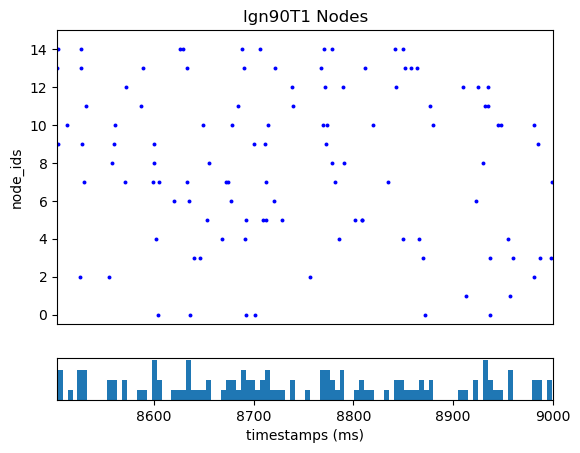

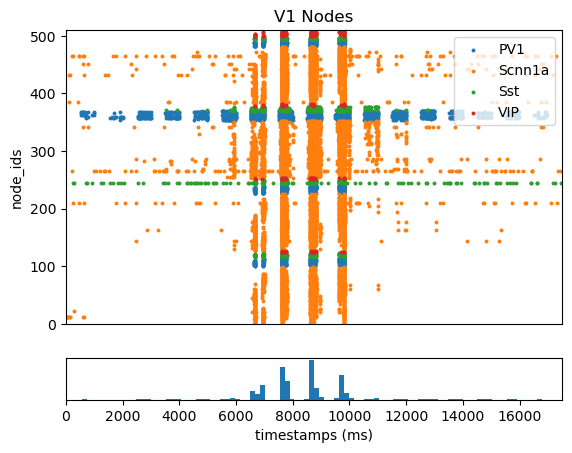

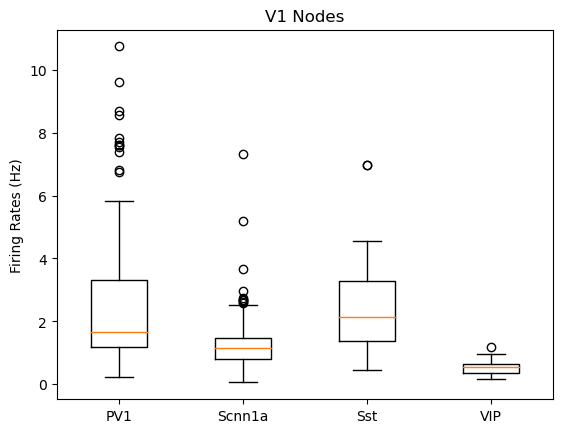

In [1]:
from bmtk.analyzer.spike_trains import plot_raster
from bmtk.analyzer.spike_trains import plot_rates_boxplot

_= plot_raster(spikes_file='C:/Users/Mehdi/Documents/Github/SCC_PCB/Model/Control/inputsFT1/lgn90T1_spikes.poisson.h5') # Path to inputsFT1/lgn90T1_spikes.poisson.h5
#_= plot_raster(spikes_file='C:/Users/.../inputsFT1/lgn90T1_spikes.poisson.h5') # Path to inputsFT1/lgn90T1_spikes.poisson.h5

_ = plot_raster(config_file='config.bionetFT1.flash.json', group_by='pop_name')
_ = plot_rates_boxplot(config_file='config.bionetFT1.flash.json', group_by='pop_name')
